In [158]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [159]:
url="https://drive.google.com/file/d/1LO4i_-TkSmxnR0dgO5_lVLZ35FtGTNzA/view?usp=drive_link"
url="https://drive.google.com/uc?export=download&confirm=1&id=" + url.split("/")[-2]
total_db = pd.read_csv(url)
total_db.sample(5)

Unnamed: 0         Nom            Etat Code_Etat  id_Etat  id_county  \
1945        1945     Harnett  North Carolina        NC    27315      29297   
485          485       Macon         Georgia        GA    27292      27821   
774          774      Ripley         Indiana        IN      151      28110   
374          374  Palm Beach         Florida        FL    27291      27709   
2326        2326     Newport    Rhode Island        RI    27322      29685   

            NAME                                           geometry     fips  \
1945     Harnett  POLYGON ((-79.221865 35.269355, -79.196097 35....  37085.0   
485        Macon  MULTIPOLYGON (((-84.05295199999999 32.530602, ...  13193.0   
774       Ripley  POLYGON ((-85.44465799999999 39.000659, -85.44...  18137.0   
374   Palm Beach  POLYGON ((-80.886169 26.769228, -80.885639 26....  12099.0   
2326     Newport  MULTIPOLYGON (((-71.288017 41.645575, -71.2864...  44005.0   

      unemp_rate_year_2013  unemp_rate_year_2014  unemp_rate_year_2015  \
1945                   7.2                   6.5                   6.0   
485                   14.6                   9.7                   8.4   
774                    6.7                   6.0                   4.6   
374                    6.4                   5.0                   4.7   
2326                   8.6                   5.9                   5.1   

      unemp_rate_year_2016  unemp_rate_year_2017  unemp_rate_year_2018  \
1945                   5.3                   4.7                   5.0   
485                    7.7                   5.8                   7.2   
774                    3.8                   3.4                   4.2   
374                    4.4                   3.7                   4.0   
2326                   4.1                   3.9                   5.2   

      med_h_income_year_2013  med_h_income_year_2014  med_h_income_year_2015  \
1945                 45257.0                 45380.0                 48301.0   
485                  28844.0                 29430.0                 30696.0   
774                  47495.0                 52491.0                 51553.0   
374                  51768.0                 52225.0                 56638.0   
2326                 67291.0                 69203.0                 66096.0   

      med_h_income_year_2016  med_h_income_year_2017  med_h_income_year_2018  \
1945                 51106.0                 51406.0                 51225.0   
485                  31358.0                 32974.0                 32868.0   
774                  55129.0                 52562.0                 57436.0   
374                  57607.0                 60059.0                 61735.0   
2326                 72776.0                 77186.0                 77760.0   

      resident_pop_year_2013  resident_pop_year_2014  resident_pop_year_2015  \
1945                 125.093                 126.769                 128.145   
485                   13.973                  13.822                  13.689   
774                   28.297                  28.343                  28.375   
374                 1376.782                1399.064                1424.772   
2326                  83.576                  83.457                  83.496   

      resident_pop_year_2016  resident_pop_year_2017  resident_pop_year_2018  \
1945                 130.822                 132.584                 134.649   
485                   13.483                  13.255                  13.153   
774                   28.412                  28.432                  28.526   
374                 1451.469                1470.583                1482.833   
2326                  83.454                  83.099                  82.796   

      snap_beneficiaries_year_2013  snap_beneficiaries_year_2014  \
1945                       21630.0                       21442.0   
485                         3039.0                        2933.0   
774                         3120.0    

In [160]:
gun_violence_db = pd.read_csv('/home/onyxia/gun_violence/rendu_final/data/gun_violence_db.csv')
gun_violence_db.sample(5)

Unnamed: 0  incident_id        date                 state  \
149753      149753       670790  2016-10-05  District of Columbia   
128521      128521       569732  2016-05-30               Georgia   
156296      156296       699420  2016-11-13               Indiana   
77039        77039       365102  2015-06-27              New York   
127010      127010       563099  2016-05-21              Illinois   

       city_or_county                          address  n_killed  n_injured  \
149753     Washington      8th Street and D Street, NW         0          0   
128521           Rome    Broad Street and Third Avenue         0          0   
156296   Indianapolis            5150 West 38th Street         0          1   
77039      Plattekill     400 block of Crescent Avenue         1          0   
127010        Chicago  900 block of North Homan Avenue         0          1   

                                             incident_url  \
149753  http://www.gunviolencearchive.org/incident/670790   
128521  http://www.gunviolencearchive.org/incident/569732   
156296  http://www.gunviolencearchive.org/incident/699420   
77039   http://www.gunviolencearchive.org/incident/365102   
127010  http://www.gunviolencearchive.org/incident/563099   

                                               source_url  \
149753  https://twitter.com/DCPoliceDept/status/783843...   
128521  http://www.northwestgeorgianews.com/rome/news/...   
156296  http://wishtv.com/2016/11/13/one-injured-in-ni...   
77039   http://www.midhudsonnews.com/News/2015/Decembe...   
127010  https://www.dnainfo.com/chicago/20160521/humbo...   

        incident_url_fields_missing  congressional_district      gun_stolen  \
149753                        False                     1.0  {0: 'Unknown'}   
128521                        False                    14.0  {0: 'Unknown'}   
156296                        False                     7.0  {0: 'Unknown'}   
77039                         False                    19.0  {0: 'Unknown'}   
127010                        False                     7.0             NaN   

              gun_type                           incident_characteristics  \
149753  {0: 'Unknown'}           ['Non-Shooting Incident', 'Car-jacking']   
128521      {0: '9mm'}  ['Non-Shooting Incident', 'Gun(s) stolen from ...   
156296  {0: 'Unknown'}  ['Shot - Wounded/Injured', 'Bar/club incident ...   
77039   {0: 'Shotgun'}  ['Shot - Dead (murder, accidental, suicide)', ...   
127010             NaN                                                NaN   

        latitude location_description  longitude  n_guns_involved  \
149753   38.8948                  NaN   -77.0230              1.0   
128521   34.2537                  NaN   -85.1729              1.0   
156296   39.8240  Limelight Nightclub   -86.2477              1.0   
77039    41.7021                  NaN   -74.0380              1.0   
127010   41.8974                  NaN   -87.7118              NaN   

                                                    notes participant_age  \
149753                                                NaN             NaN   
128521                                                NaN             NaN   
156296                          Man shot at 2:0am in bar;             NaN   
77039   perp stabbed 3 people, shot by vics fam member...       {0: '25'}   
127010  Humboldt Park - man shot while driving. lower ...       {0: '33'}   

                   participant_age_group      participant_gender  \
149753  {1: 'Adult 18+', 2: 'Adult 18+'}  {1: 'Male', 2: 'Male'}   
128521                               NaN                     NaN   
156296  {0: 'Adult 18+', 1: 'Adult 18+'}             {0: 'Male'}   
77039                   {0: 'Adult 18+'}             {0: 'Male'}   
127010                  {0: 'Adult 18+'}             {0: 'Male'}   

          participant_name participant_relationship  \
149753                 NaN                      NaN   
128521                 NaN                      N

In [161]:
from shapely import wkt
def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None
total_db = total_db.dropna(subset=['geometry'])
total_db['geometry'] = total_db['geometry'].apply(wkt_loads)

In [162]:
total_db = total_db.loc[total_db['Etat'] != 'Alaska']
total_db = total_db.loc[total_db['Etat'] != 'Hawaii']

gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Alaska']
gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Hawaii']

In [163]:
total_db_geo = (
    gpd.GeoDataFrame(total_db)
    .set_geometry('geometry')
    .set_crs('EPSG:4269')
)

In [164]:
#changement de valeur pour Richmond, Virginia car valeur aberrante de 8.755 alors qu'il y avait 204 214	habitants en 2010
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2013'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2014'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2015'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2016'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2017'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2018'] = 204.214 

In [165]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(gun_violence_db['longitude'], gun_violence_db['latitude'])]
gun_violence_geo = gpd.GeoDataFrame(gun_violence_db, geometry=geometry, crs='EPSG:4326')

gun_violence_geo = gun_violence_geo.set_crs('EPSG:4326')
gun_violence_geo = gun_violence_geo[gun_violence_geo.geometry.x <= -50]

Tentative de merge les deux bases

In [166]:
total_db_geo=total_db_geo.to_crs('EPSG:4326')
merge_geo = gpd.sjoin(gun_violence_geo, total_db_geo, predicate='within')
geom_county=total_db_geo[['id_county','geometry']]
geom_county.head()

id_county                                           geometry
0      27336  POLYGON ((-86.92119 32.65754, -86.92035 32.658...
1      27337  POLYGON ((-88.02858 30.22676, -88.02399 30.230...
2      27338  POLYGON ((-85.74803 31.61918, -85.74543 31.618...
3      27339  POLYGON ((-87.42194 33.00338, -87.31854 33.006...
4      27340  POLYGON ((-86.96336 33.85822, -86.95967 33.857...

In [167]:
merge_geo2=pd.merge(merge_geo, geom_county, on='id_county')
merge_geo2.head()

Unnamed: 0_left  incident_id        date         state  \
0                0       461105  2013-01-01  Pennsylvania   
1              224       481268  2013-10-21  Pennsylvania   
2             1231        94504  2014-01-08  Pennsylvania   
3             1335        94128  2014-01-08  Pennsylvania   
4             1587        95997  2014-01-10  Pennsylvania   

          city_or_county                                    address  n_killed  \
0             Mckeesport  1506 Versailles Avenue and Coursin Street         0   
1  Pittsburgh (Homewood)                 7200 block of Kelly Street         2   
2                Munhall                Waterfront Shopping Complex         1   
3              Homestead           Steak ‘n Shake at The Waterfront         1   
4             Pittsburgh   Craft Avenue and Boulevard of the Allies         0   

   n_injured                                       incident_url  \
0          4  http://www.gunviolencearchive.org/incident/461105   
1          5  http://www.gunviolencearchive.org/incident/481268   
2          0   http://www.gunviolencearchive.org/incident/94504   
3          0   http://www.gunviolencearchive.org/incident/94128   
4          0   http://www.gunviolencearchive.org/incident/95997   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.wtae.com/news/local/allegheny/two-p...   
2  http://www.post-gazette.com/local/south/2014/0...   
3  http://pittsburgh.cbslocal.com/2014/01/22/u-s-...   
4  http://pittsburgh.cbslocal.com/2014/01/10/loca...   

   incident_url_fields_missing  congressional_district gun_stolen gun_type  \
0                        False                    14.0        NaN      NaN   
1                        False                    14.0        NaN      NaN   
2                        False                    14.0        NaN      NaN   
3                        False                    14.0        NaN      NaN   
4                        False                    14.0        NaN      NaN   

                            incident_characteristics  latitude  \
0  ['Shot - Wounded/Injured', 'Mass Shooting (4+ ...   40.3467   
1  ['Shot - Wounded/Injured', 'Shot - Dead (murde...   40.4555   
2  ['Shot - Dead (murder, accidental, suicide)', ...   40.3923   
3  ['Shot - Dead (murder, accidental, suicide)', ...   40.4059   
4                                                NaN   40.4358   

   location_description  longitude  n_guns_involved  \
0                   NaN   -79.8559              NaN   
1  Diverse Banquet Hall   -79.8970              NaN   
2                   NaN   -79.9000              NaN   
3                   NaN   -79.9120              NaN   
4                   NaN   -79.9615              NaN   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

               participant_age  \
0                    {0: '20'}   
1           {0: '21', 1: '27'}   
2           {0: '20', 1: '17'}   
3  {0: '20', 1: '20', 2: '17'}   
4                          NaN   

                               participant_age_group  \
0  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...   
1  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...   
2                  {0: 'Adult 18+', 1: 'Teen 12-17'}   
3  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Teen 12-17'}   
4                                                NaN   

                                  participant_gender  \
0     {0: 'Male', 1: 'Male', 3: 'Male', 4: 'Female'}   
1  {0: 'Female', 1: 'Male', 2: 'Female', 3: 'Fema...   
2                             {0: 'Male', 1: 'Male'}   
3                  {0: 'Male', 1: 'Male', 2: 'Male'}   
4                                                NaN 

In [168]:
merge_geo = merge_geo2.rename(columns={'geometry_x': 'point_geometry', 'geometry_y': 'polygon_geometry'})
merge_geo.head()

Unnamed: 0_left  incident_id        date         state  \
0                0       461105  2013-01-01  Pennsylvania   
1              224       481268  2013-10-21  Pennsylvania   
2             1231        94504  2014-01-08  Pennsylvania   
3             1335        94128  2014-01-08  Pennsylvania   
4             1587        95997  2014-01-10  Pennsylvania   

          city_or_county                                    address  n_killed  \
0             Mckeesport  1506 Versailles Avenue and Coursin Street         0   
1  Pittsburgh (Homewood)                 7200 block of Kelly Street         2   
2                Munhall                Waterfront Shopping Complex         1   
3              Homestead           Steak ‘n Shake at The Waterfront         1   
4             Pittsburgh   Craft Avenue and Boulevard of the Allies         0   

   n_injured                                       incident_url  \
0          4  http://www.gunviolencearchive.org/incident/461105   
1          5  http://www.gunviolencearchive.org/incident/481268   
2          0   http://www.gunviolencearchive.org/incident/94504   
3          0   http://www.gunviolencearchive.org/incident/94128   
4          0   http://www.gunviolencearchive.org/incident/95997   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.wtae.com/news/local/allegheny/two-p...   
2  http://www.post-gazette.com/local/south/2014/0...   
3  http://pittsburgh.cbslocal.com/2014/01/22/u-s-...   
4  http://pittsburgh.cbslocal.com/2014/01/10/loca...   

   incident_url_fields_missing  congressional_district gun_stolen gun_type  \
0                        False                    14.0        NaN      NaN   
1                        False                    14.0        NaN      NaN   
2                        False                    14.0        NaN      NaN   
3                        False                    14.0        NaN      NaN   
4                        False                    14.0        NaN      NaN   

                            incident_characteristics  latitude  \
0  ['Shot - Wounded/Injured', 'Mass Shooting (4+ ...   40.3467   
1  ['Shot - Wounded/Injured', 'Shot - Dead (murde...   40.4555   
2  ['Shot - Dead (murder, accidental, suicide)', ...   40.3923   
3  ['Shot - Dead (murder, accidental, suicide)', ...   40.4059   
4                                                NaN   40.4358   

   location_description  longitude  n_guns_involved  \
0                   NaN   -79.8559              NaN   
1  Diverse Banquet Hall   -79.8970              NaN   
2                   NaN   -79.9000              NaN   
3                   NaN   -79.9120              NaN   
4                   NaN   -79.9615              NaN   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

               participant_age  \
0                    {0: '20'}   
1           {0: '21', 1: '27'}   
2           {0: '20', 1: '17'}   
3  {0: '20', 1: '20', 2: '17'}   
4                          NaN   

                               participant_age_group  \
0  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...   
1  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...   
2                  {0: 'Adult 18+', 1: 'Teen 12-17'}   
3  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Teen 12-17'}   
4                                                NaN   

                                  participant_gender  \
0     {0: 'Male', 1: 'Male', 3: 'Male', 4: 'Female'}   
1  {0: 'Female', 1: 'Male', 2: 'Female', 3: 'Fema...   
2                             {0: 'Male', 1: 'Male'}   
3                  {0: 'Male', 1: 'Male', 2: 'Male'}   
4                                                NaN 

In [169]:
pd.set_option('display.max_columns', None)
merge_geo.sample()

Unnamed: 0_left  incident_id        date     state city_or_county  \
133446           202892       911192  2017-08-10  New York      Riverhead   

                address  n_killed  n_injured  \
133446  1023 Parkway St         0          0   

                                             incident_url  \
133446  http://www.gunviolencearchive.org/incident/911192   

                                               source_url  \
133446  http://riverheadnewsreview.timesreview.com/201...   

        incident_url_fields_missing  congressional_district  \
133446                        False                     1.0   

                        gun_stolen                      gun_type  \
133446  {0: 'Stolen', 1: 'Stolen'}  {0: 'Handgun', 1: 'Handgun'}   

       incident_characteristics  latitude location_description  longitude  \
133446                      NaN   40.9207                  NaN   -72.6803   

        n_guns_involved                                              notes  \
133446              2.0  money, 2 handguns report stolen from home, REP...   

       participant_age participant_age_group participant_gender  \
133446             NaN                   NaN                NaN   

       participant_name participant_relationship participant_status  \
133446              NaN                      NaN                NaN   

       participant_type sources  state_house_district  state_senate_district  \
133446              NaN     NaN                   2.0                    1.0   

        indic_suicide  indic_defens  indic_school  indic_home_inv  \
133446              0             0             0               0   

        indic_accident              point_geometry  index_right  \
133446               0  POINT (-72.68030 40.92070)         1892   

        Unnamed: 0_right      Nom      Etat Code_Etat  id_Etat  id_county  \
133446              1892  Suffolk  New York        NY    27314      29243   

           NAME     fips  unemp_rate_year_2013  unemp_rate_year_2014  \
133446  Suffolk  36103.0                   5.7                   4.8   

        unemp_rate_year_2015  unemp_rate_year_2016  unemp_rate_year_2017  \
133446                   4.2                   4.3                   4.3   

        unemp_rate_year_2018  med_h_income_year_2013  med_h_income_year_2014  \
133446                   4.9                 84940.0                 85886.0   

        med_h_income_year_2015  med_h_income_year_2016  \
133446                 87634.0                 92310.0   

        med_h_income_year_2017  med_h_income_year_2018  \
133446                 94108.0                100075.0   

        resident_pop_year_2013  resident_pop_year_2014  \
133446                1497.389                1495.553   

        resident_pop_year_2015  resident_pop_year_2016  \
133446                1491.997                1486.699   

        resident_pop_year_2017  resident_pop_year_2018  \
133446                1483.862                1482.275   

        snap_beneficiaries_year_2013  snap_beneficiaries_year_2014  \
133446                      118451.0                      127048.0   

        snap_beneficiaries_year_2015  snap_beneficiaries_year_2016  \
133446                      129039.0                      121172.0   

        snap_beneficiaries_year_2017  snap_beneficiaries_year_2018  \
133446                      109084.0                       98754.0   

        bachelors_deg_year_2013  bachelors_deg_year_2014  \
133446                     32.9                     33.5   

        bachelors_deg_year_2015  bachelors_deg_year_2016  \
133446                     34.0                     34.4   

        bachelors_deg_year_2017  bachelors_deg_year_2018  score_legis  \
133446                     35.0                     35.6          4.7   

        bchecks_2013  bchecks_2014  bchecks_2015  bchecks_2016  bchecks_2017  \
133446        353064        365427        346048        404772        382495   

        bchecks_2018   per_dem  per_gop  \
133446

# Stats descriptives sur les indicateurs socio-économiques des comtés
## Revenu médian

In [170]:
print("Stats descriptives sur les indicateurs socio-économiques des comtés")
print("Revenu médian")

Stats descriptives sur les indicateurs socio-économiques des comtés
Revenu médian


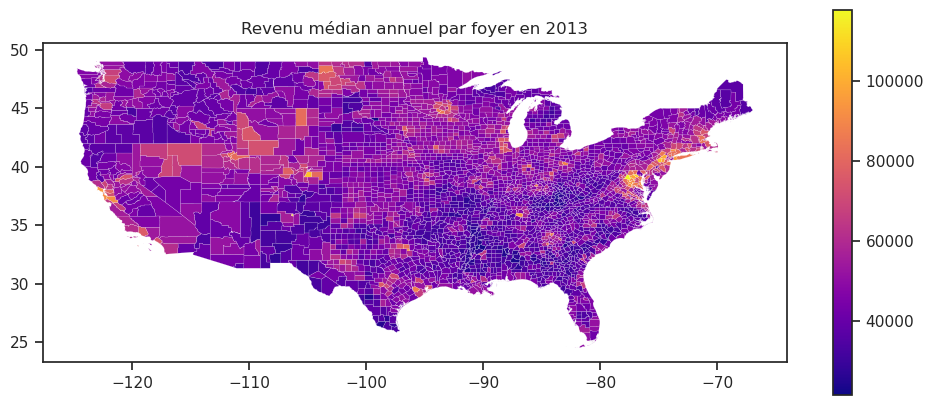

In [171]:
total_db_geo.plot(aspect = 1, figsize = (12,5), column = "med_h_income_year_2013", legend = True, cmap = "plasma", linewidth = 0.1)
plt.title("Revenu médian annuel par foyer en 2013")
plt.show()

Ces représentations sont difficilement lisibles car il y a beaucoup de comtés. Une solution est de classer les comtés et de les colorier en fonction de leur classement, en définissant par exemple 4 quantiles. 

In [172]:
print("Ces représentations sont difficilement lisibles car il y a beaucoup de comtés. Une solution est de classer les comtés et de les colorier en fonction de leur classement, en définissant par exemple 4 quantiles. ")

Ces représentations sont difficilement lisibles car il y a beaucoup de comtés. Une solution est de classer les comtés et de les colorier en fonction de leur classement, en définissant par exemple 4 quantiles. 


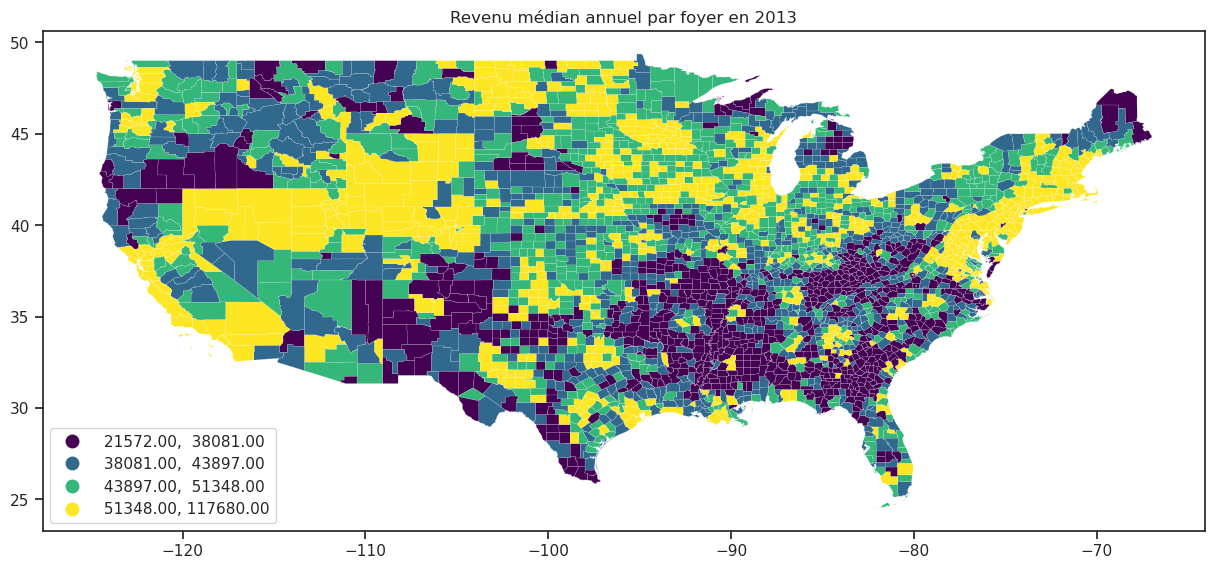

In [173]:
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "med_h_income_year_2013", legend = True, 
scheme = "Quantiles", k = 4, linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Revenu médian annuel par foyer en 2013")
plt.show()

Cette représentation a l'avantage de permettre de distinguer rapidement des groupes de comtés. Cependant, il faut garder en tête que la dernière catégorie recouvre beaucoup de valeurs différentes (du simple au double).

On voit sur cette carte que les comtés du Sud-Ouest sont ceux avec le revenu médian le plus faible, alors que les plus rivhes se situent surtout au Nord.

In [174]:
print("Cette représentation a l'avantage de permettre de distinguer rapidement des groupes de comtés. Cependant, il faut garder en tête que la dernière catégorie recouvre beaucoup de valeurs différentes (du simple au double).")
print("On voit sur cette carte que les comtés du Sud-Ouest sont ceux avec le revenu médian le plus faible, alors que les plus rivhes se situent surtout au Nord.")

Cette représentation a l'avantage de permettre de distinguer rapidement des groupes de comtés. Cependant, il faut garder en tête que la dernière catégorie recouvre beaucoup de valeurs différentes (du simple au double).
On voit sur cette carte que les comtés du Sud-Ouest sont ceux avec le revenu médian le plus faible, alors que les plus rivhes se situent surtout au Nord.


Text(0.5, 0, 'Revenu annuel médian par foyer en 2013')

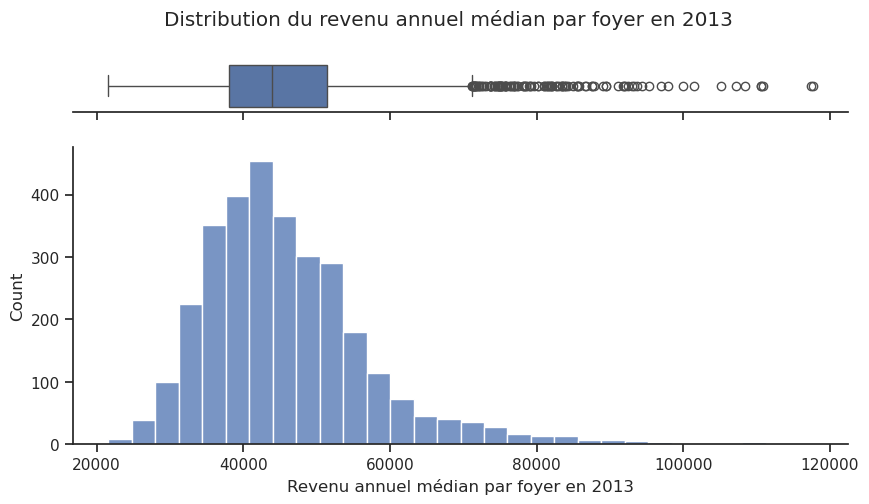

In [175]:
sns.set(style="ticks")
x = total_db_geo["med_h_income_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize = (10, 5), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.suptitle("Distribution du revenu annuel médian par foyer en 2013")
ax_hist.set_xlabel('Revenu annuel médian par foyer en 2013')

La distribution du revenu annuel médian par foyer en 2013 semble suivre une loi log-normale, car elle ressemble à une normale avec une plus grande queue à droite. Le box-plot semble confirmer cela : les "valeurs aberrantes" ne sont présentes qu'à droite de la distribution.

## Proportion de détenteurs d'un bachelor

In [176]:
print("La distribution du revenu annuel médian par foyer en 2013 semble suivre une loi log-normale, car elle ressemble à une normale avec une plus grande queue à droite. Le box-plot semble confirmer cela : les 'valeurs aberrantes' ne sont présentes qu'à droite de la distribution.")
print("Proportion de détenteurs d'un bachelor")

La distribution du revenu annuel médian par foyer en 2013 semble suivre une loi log-normale, car elle ressemble à une normale avec une plus grande queue à droite. Le box-plot semble confirmer cela : les 'valeurs aberrantes' ne sont présentes qu'à droite de la distribution.
Proportion de détenteurs d'un bachelor


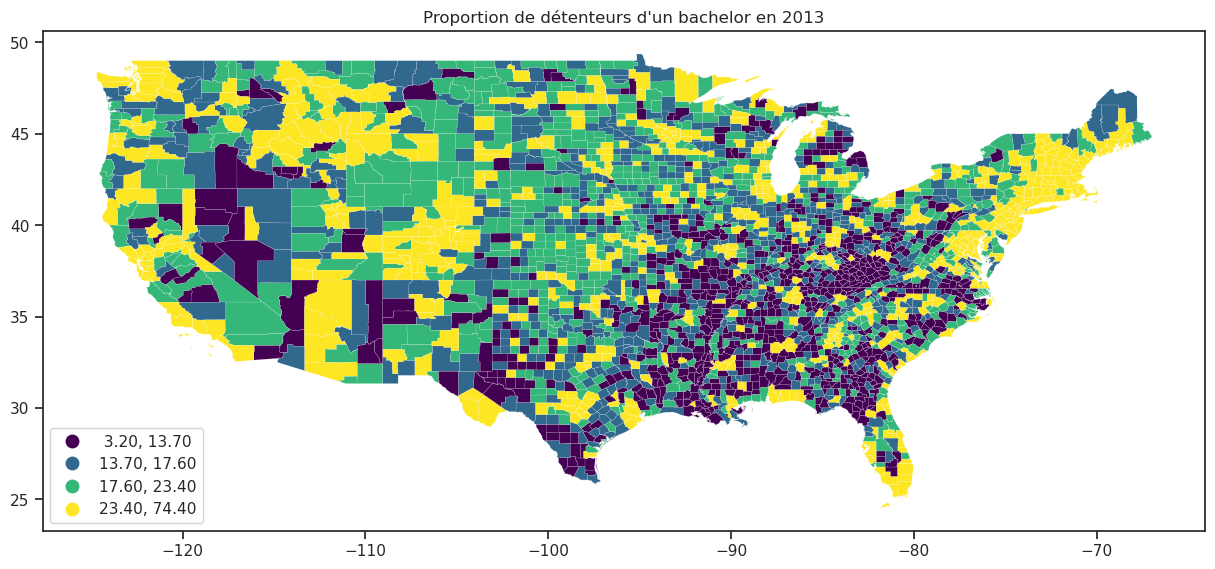

In [177]:
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "bachelors_deg_year_2013", legend = True, scheme = "QUANTILES", 
k=4, linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Proportion de détenteurs d'un bachelor en 2013")
plt.show()

A nouveau, le Nord-Est est privilégié, avec la plus grosse part de détententeurs de bachelors. Le Sud-Est est encore une fois défavorisé, avec preque tout le premier quantile situé à cet endroit.

In [178]:
print("A nouveau, le Nord-Est est privilégié, avec la plus grosse part de détententeurs de bachelors. Le Sud-Est est encore une fois défavorisé, avec preque tout le premier quantile situé à cet endroit.")

A nouveau, le Nord-Est est privilégié, avec la plus grosse part de détententeurs de bachelors. Le Sud-Est est encore une fois défavorisé, avec preque tout le premier quantile situé à cet endroit.


Text(0.5, 0, 'Proportion de diplômés de bachelor en 2013')

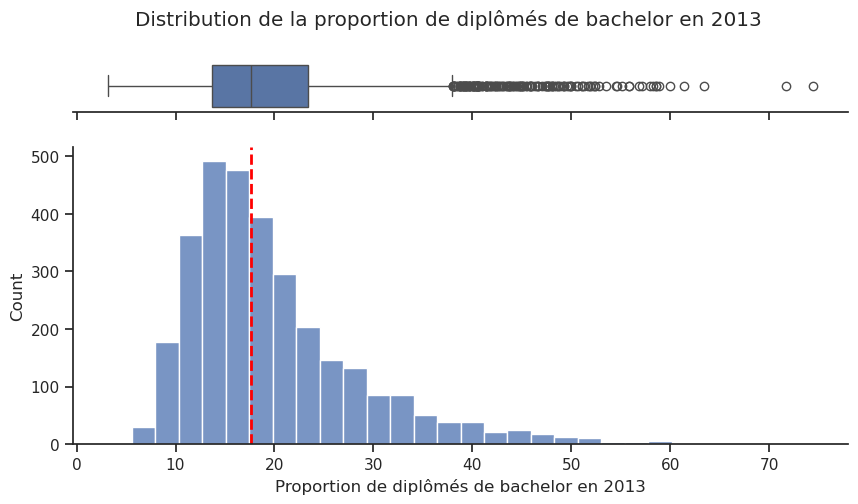

In [179]:
sns.set(style="ticks")
x = total_db_geo["bachelors_deg_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize = (10, 5), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution de la proportion de diplômés de bachelor en 2013")
ax_hist.set_xlabel('Proportion de diplômés de bachelor en 2013')

On obtient encore une fois une courbe normale biaisé vers la droite de la distribution. Les valeurs aberrantes sont toutes situées de ce côté de la distribution. On voit bien sur le boxplot les inégalités très importantes qui peut exister entre les comtés. Cela est assez logique : le comté étant un découpage relativement fin du territoire américain, il n'est pas étonnant de grosses variations à cette échelle.

## Bénéficiaires du programme SNAP

In [180]:
print("On obtient encore une fois une courbe normale biaisé vers la droite de la distribution. Les valeurs aberrantes sont toutes situées de ce côté de la distribution. On voit bien sur le boxplot les inégalités très importantes qui peut exister entre les comtés. Cela est assez logique : le comté étant un découpage relativement fin du territoire américain, il n'est pas étonnant de grosses variations à cette échelle.")
print("Bénéficiaires du programme SNAP")

On obtient encore une fois une courbe normale biaisé vers la droite de la distribution. Les valeurs aberrantes sont toutes situées de ce côté de la distribution. On voit bien sur le boxplot les inégalités très importantes qui peut exister entre les comtés. Cela est assez logique : le comté étant un découpage relativement fin du territoire américain, il n'est pas étonnant de grosses variations à cette échelle.
Bénéficiaires du programme SNAP


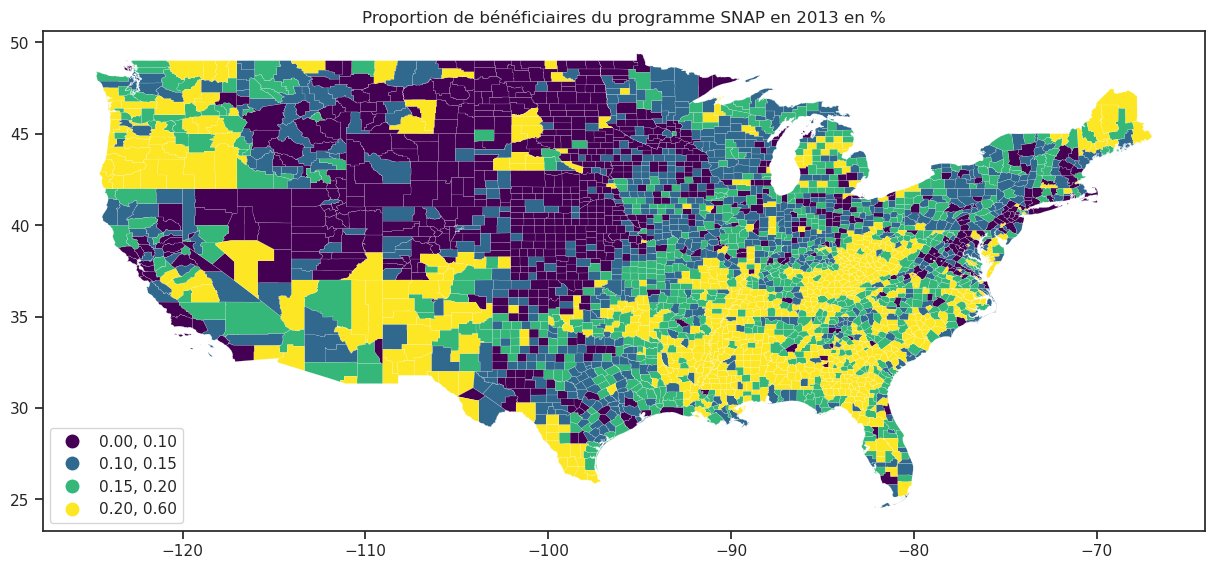

In [181]:
total_db_geo["snap_share_year_2013"] = total_db_geo["snap_beneficiaries_year_2013"] / total_db_geo["resident_pop_year_2013"] / 1000
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "snap_share_year_2013", legend = True, scheme = "QUANTILES", 
k=4, linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Proportion de bénéficiaires du programme SNAP en 2013 en %")
plt.show()

On retrouve la distinction Nord-Est privilégié / Sud-Est défavorisé ici encore : les taux de bénéficaires les plus bas sont situés au Nord-Est et les plus importants dnas le Sud, et en particulier le Sud-Est. Le Nord et le centre du pays font partie des deux premiers quartiles, alors que le Nord-Ouest fait également partie des territoires avec la plus grande part de bénéficiaires.

In [182]:
print("On retrouve la distinction Nord-Est privilégié / Sud-Est défavorisé ici encore : les taux de bénéficaires les plus bas sont situés au Nord-Est et les plus importants dnas le Sud, et en particulier le Sud-Est. Le Nord et le centre du pays font partie des deux premiers quartiles, alors que le Nord-Ouest fait également partie des territoires avec la plus grande part de bénéficiaires.")

On retrouve la distinction Nord-Est privilégié / Sud-Est défavorisé ici encore : les taux de bénéficaires les plus bas sont situés au Nord-Est et les plus importants dnas le Sud, et en particulier le Sud-Est. Le Nord et le centre du pays font partie des deux premiers quartiles, alors que le Nord-Ouest fait également partie des territoires avec la plus grande part de bénéficiaires.


Text(0.5, 0, 'Proportion de bénéficiaire du SNAP en 2013 en %')

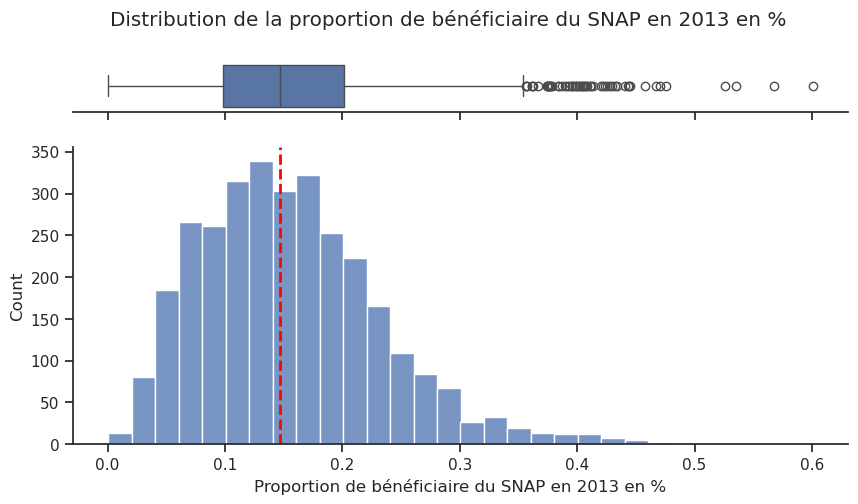

In [183]:

sns.set(style="ticks")
x = total_db_geo["snap_share_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,5))

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution de la proportion de bénéficiaire du SNAP en 2013 en %")
ax_hist.set_xlabel('Proportion de bénéficiaire du SNAP en 2013 en %')

On retrouve globalement la même forme de distribution, mais un peu plus étalée que les deux vues précédemment. Encore une fois, la courbe en cloche est biaisée vers la droite, où se situent toutes les valeurs aberrantes. 

## Taux de chômage

In [184]:
print("On retrouve globalement la même forme de distribution, mais un peu plus étalée que les deux vues précédemment. Encore une fois, la courbe en cloche est biaisée vers la droite, où se situent toutes les valeurs aberrantes. ")
print("Taux de chômage")

On retrouve globalement la même forme de distribution, mais un peu plus étalée que les deux vues précédemment. Encore une fois, la courbe en cloche est biaisée vers la droite, où se situent toutes les valeurs aberrantes. 
Taux de chômage


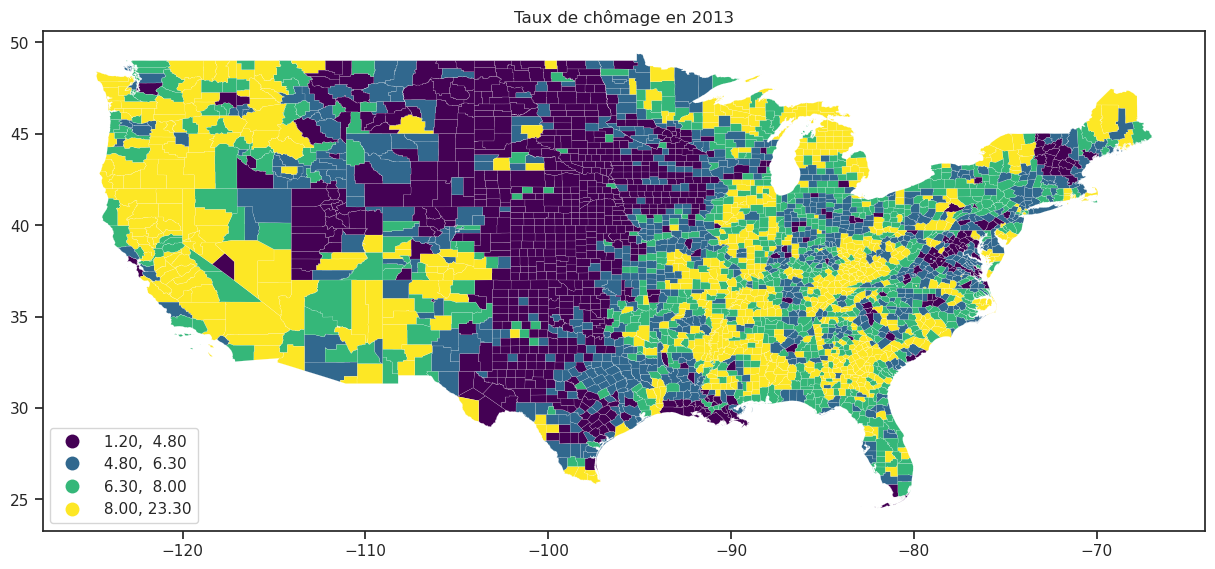

In [185]:
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "unemp_rate_year_2013", legend = True, scheme = "QUANTILES", k=4, 
linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Taux de chômage en 2013")
plt.show()

La répartition géographique du taux de chômage semble totalement différente des autres : toute la côte Ouest est dans le dernier quartile, et l'Est aussi, alors que c'est le centre qui a le taux de chômage le plus bas. Certaines zones connues pour leur désindustrialisation sont dans le dernier quartile, comme la région de Détroit par exemple.

In [186]:
print("La répartition géographique du taux de chômage semble totalement différente des autres : toute la côte Ouest est dans le dernier quartile, et l'Est aussi, alors que c'est le centre qui a le taux de chômage le plus bas. Certaines zones connues pour leur désindustrialisation sont dans le dernier quartile, comme la région de Détroit par exemple.")

La répartition géographique du taux de chômage semble totalement différente des autres : toute la côte Ouest est dans le dernier quartile, et l'Est aussi, alors que c'est le centre qui a le taux de chômage le plus bas. Certaines zones connues pour leur désindustrialisation sont dans le dernier quartile, comme la région de Détroit par exemple.


Text(0.5, 0, 'Taux de chômage en 2013')

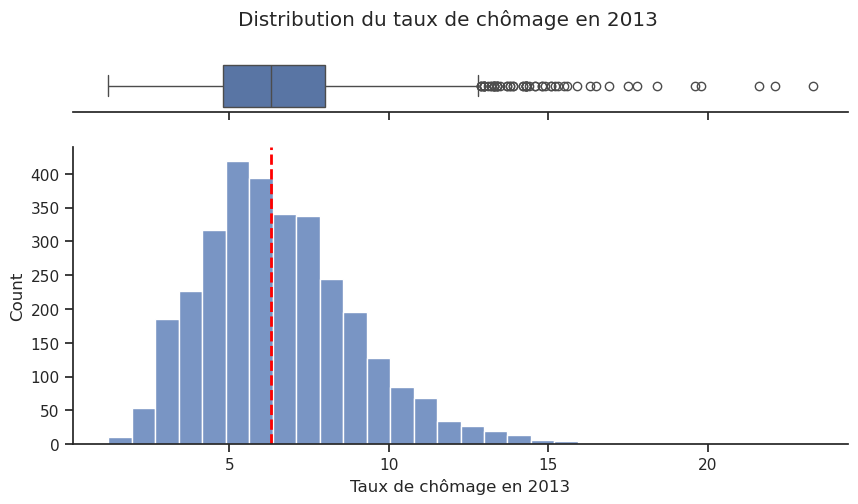

In [187]:
sns.set(style="ticks")
x = total_db_geo["unemp_rate_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,5))

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution du taux de chômage en 2013")
ax_hist.set_xlabel('Taux de chômage en 2013')

La distribution a la forme que nous avons vu déjà plusieurs fois. On remarque que les valuers aberrantes sont de plus en plus espacées au fur et à mesure qu'elles augmentent.

## Vote pour les démocrates à l'élection présidentielle de 2016

In [188]:
print("La distribution a la forme que nous avons vu déjà plusieurs fois. On remarque que les valuers aberrantes sont de plus en plus espacées au fur et à mesure qu'elles augmentent.")
print("Vote pour les démocrates à l'élection présidentielle de 2016")

La distribution a la forme que nous avons vu déjà plusieurs fois. On remarque que les valuers aberrantes sont de plus en plus espacées au fur et à mesure qu'elles augmentent.
Vote pour les démocrates à l'élection présidentielle de 2016


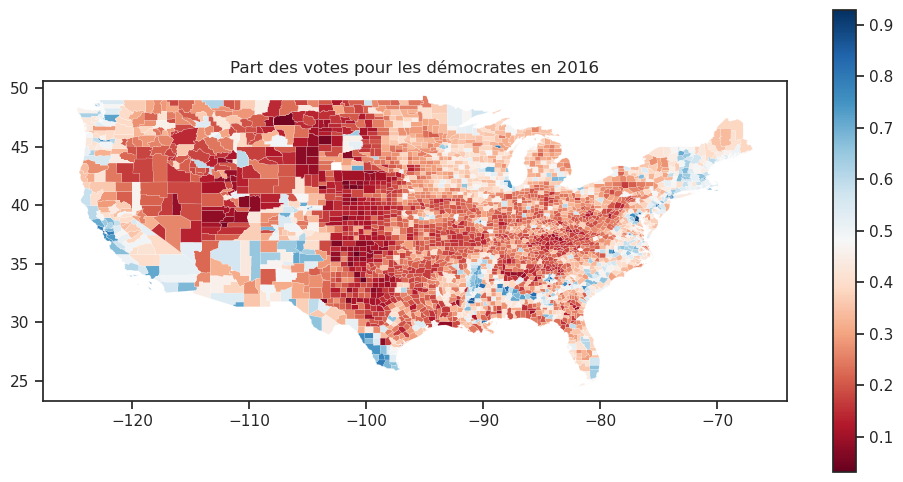

In [189]:
total_db_geo.plot(aspect = 1, figsize = (12,6), column = "per_dem", legend = True, linewidth = 0.1, cmap = "RdBu")
plt.title("Part des votes pour les démocrates en 2016")
plt.show()

Cette représentation a le défaut de laisser penser que les républicains ont largement gagné le vote de 2016, puisque la carte est en grande majorité rouge. Pour remédier à cela, il faut faire une représentation qui pondère le vote par la population résidente de 2016.

In [190]:
print("Cette représentation a le défaut de laisser penser que les républicains ont largement gagné le vote de 2016, puisque la carte est en grande majorité rouge. Pour remédier à cela, il faut faire une représentation qui pondère le vote par la population résidente de 2016.")

Cette représentation a le défaut de laisser penser que les républicains ont largement gagné le vote de 2016, puisque la carte est en grande majorité rouge. Pour remédier à cela, il faut faire une représentation qui pondère le vote par la population résidente de 2016.


/tmp/ipykernel_662618/341852764.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




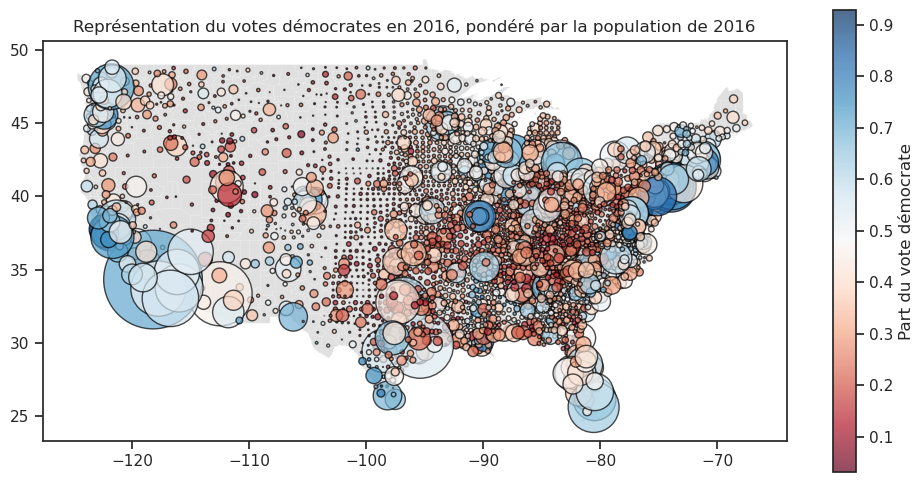

In [191]:
total_db_geo = total_db_geo.to_crs('4329')
total_db_geo['centroid'] = total_db_geo['geometry'].centroid

# Create a GeoDataFrame with centroids
gdf_centroids = gpd.GeoDataFrame(total_db_geo[['resident_pop_year_2016', "per_dem", "centroid"]], geometry=total_db_geo['centroid'])

# Plot
# Plot polygons
fig, ax = plt.subplots(figsize=(12, 6))
total_db_geo.plot(ax=ax, color='lightgray', alpha=0.7, edgecolor='white', linewidth=0.1)

# Plot centroids as dots with color and size based on variables
sc = ax.scatter(
    gdf_centroids['centroid'].x,
    gdf_centroids['centroid'].y,
    c=gdf_centroids['per_dem'],
    cmap='RdBu',
    s=gdf_centroids['resident_pop_year_2016']*0.5,
    alpha=0.7,
    marker='o',
    edgecolors='black',  # Add black edges for better visibility
    linewidths=1,        # Adjust linewidth of the edges
)

# Set plot title and labels
plt.title('Représentation du votes démocrates en 2016, pondéré par la population de 2016')

# Add colorbar
cbar = plt.colorbar(sc, label='Part du vote démocrate')

# Show the plot
plt.show()

Même si la carte n'est pas forcément évidente à lire à cause des chevauchements des cercles (dont la taille dépend de la population résidente), on voit que le bleu et le rouge (et donc les électeurs démocrates et républicains) sont relativement égaux sur le territoire, ce qui est plus fidèle au résultat de l'élection. La Californie et le Nord-Est (qui sont souvent favorisés dans les statistiques précédentes) sont plutôt démocrates, alors que le Sud-Est, plus défavorisé, penche plutôt en faveur des républicains

In [192]:
print("Même si la carte n'est pas forcément évidente à lire à cause des chevauchements des cercles (dont la taille dépend de la population résidente), on voit que le bleu et le rouge (et donc les électeurs démocrates et républicains) sont relativement égaux sur le territoire, ce qui est plus fidèle au résultat de l'élection. La Californie et le Nord-Est (qui sont souvent favorisés dans les statistiques précédentes) sont plutôt démocrates, alors que le Sud-Est, plus défavorisé, penche plutôt en faveur des républicains")

Même si la carte n'est pas forcément évidente à lire à cause des chevauchements des cercles (dont la taille dépend de la population résidente), on voit que le bleu et le rouge (et donc les électeurs démocrates et républicains) sont relativement égaux sur le territoire, ce qui est plus fidèle au résultat de l'élection. La Californie et le Nord-Est (qui sont souvent favorisés dans les statistiques précédentes) sont plutôt démocrates, alors que le Sud-Est, plus défavorisé, penche plutôt en faveur des républicains


## Comparaison des différentes années

Nous avons les données sur plusieurs années (entre 2013 et 2018, années de constitution de la base des incidents). Plutôt que faire une carte par année, nous allons vérifier que les données ne changent pas trop d'une année à l'autre, et que les tendances générales restent stables. Nous allons donc regarder les matrices de corrélation d'une même variable entre différentes années.

### Chômage

In [193]:
print("Comparaison des différentes années")
print("Nous avons les données sur plusieurs années (entre 2013 et 2018, années de constitution de la base des incidents). Plutôt que faire une carte par année, nous allons vérifier que les données ne changent pas trop d'une année à l'autre, et que les tendances générales restent stables. Nous allons donc regarder les matrices de corrélation d'une même variable entre différentes années.")
print("Chômage")

Comparaison des différentes années
Nous avons les données sur plusieurs années (entre 2013 et 2018, années de constitution de la base des incidents). Plutôt que faire une carte par année, nous allons vérifier que les données ne changent pas trop d'une année à l'autre, et que les tendances générales restent stables. Nous allons donc regarder les matrices de corrélation d'une même variable entre différentes années.
Chômage


In [194]:
matrix = total_db_geo[["unemp_rate_year_2013", "unemp_rate_year_2014", "unemp_rate_year_2015", 
"unemp_rate_year_2016", "unemp_rate_year_2017", "unemp_rate_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des taux de chômage", labels = {"color" : "Corrélation"})
fig.show()

On voit que toutes les corrélations sont supérieures à 80%, ce qui est relativement important et laisse penser que le taux de chômage reste relativement stable sur les années.

In [195]:
print("On voit que toutes les corrélations sont supérieures à 80%, ce qui est relativement important et laisse penser que le taux de chômage reste relativement stable sur les années.")

On voit que toutes les corrélations sont supérieures à 80%, ce qui est relativement important et laisse penser que le taux de chômage reste relativement stable sur les années.


Text(0.5, 1, 'Hexbin du taux de chômage entre 2013 et 2018')

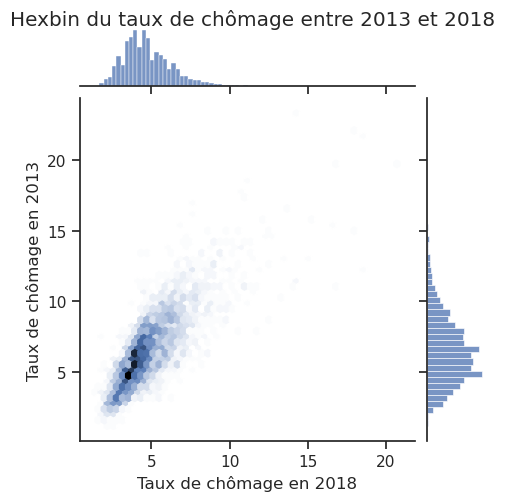

In [196]:
sns.set_theme(style="ticks")
x = total_db_geo["unemp_rate_year_2018"]
y = total_db_geo["unemp_rate_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex", height = 5)
joint_plot.set_axis_labels("Taux de chômage en 2018", "Taux de chômage en 2013")
joint_plot.fig.suptitle("Hexbin du taux de chômage entre 2013 et 2018", y =1)

Cet hexbin montre que les taux de chômage entre 2013 et 2018 sont effectivement positivement corrélés. On remarque également qu'il n'y a que très peu de comtés ayant un faible taux à une année et un taux important pour l'autre année, ce qui suggère que les analyses resteront valables peu importe l'année retenue pour cette variable. Il convient de vérifier cela pour les autres variables.

### Revenu annuel médian par foyer

In [197]:
print("Cet hexbin montre que les taux de chômage entre 2013 et 2018 sont effectivement positivement corrélés. On remarque également qu'il n'y a que très peu de comtés ayant un faible taux à une année et un taux important pour l'autre année, ce qui suggère que les analyses resteront valables peu importe l'année retenue pour cette variable. Il convient de vérifier cela pour les autres variables.")
print("Revenu annuel médian par foyer")

Cet hexbin montre que les taux de chômage entre 2013 et 2018 sont effectivement positivement corrélés. On remarque également qu'il n'y a que très peu de comtés ayant un faible taux à une année et un taux important pour l'autre année, ce qui suggère que les analyses resteront valables peu importe l'année retenue pour cette variable. Il convient de vérifier cela pour les autres variables.
Revenu annuel médian par foyer


In [198]:
matrix = total_db_geo[["med_h_income_year_2013", "med_h_income_year_2014", "med_h_income_year_2015", 
"med_h_income_year_2016", "med_h_income_year_2017", "med_h_income_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des revenues médians", labels = {"color" : "Corrélation"})
fig.show()

Text(0.5, 1, 'Hexbin du revenu annuel médian par foyer entre 2013 et 2018')

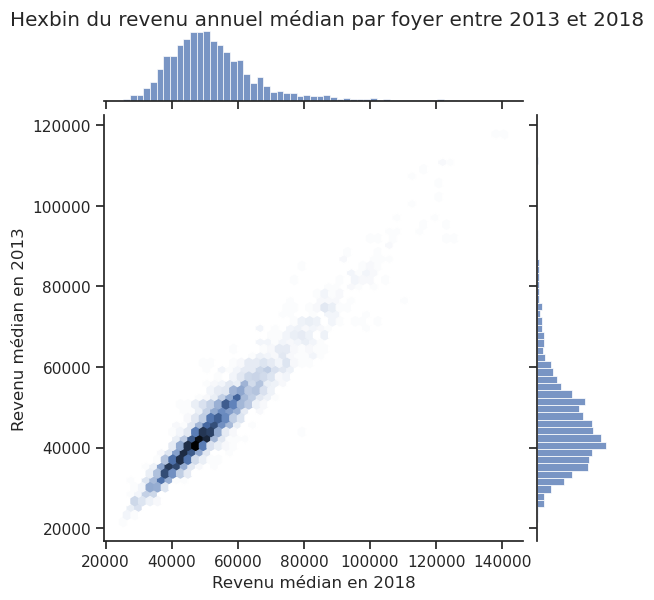

In [199]:
sns.set_theme(style="ticks")
x = total_db_geo["med_h_income_year_2018"]
y = total_db_geo["med_h_income_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex")
joint_plot.set_axis_labels("Revenu médian en 2018", "Revenu médian en 2013")
joint_plot.fig.suptitle("Hexbin du revenu annuel médian par foyer entre 2013 et 2018", y = 1)

On observe la même chose que pour le chômage : les corrélations sont mêmes plus importantes puisque toutes supérieures à 95%. Le hexbin montre également cette quasi parfaite corrélation entre les deux années extrêmes, car tous les comtés sont situés sur la diagonale. Il y a donc très peu de comtés qui sont passés d'un revenu médian important à un revenu médian faible (ou l'inverse).

### Proportion de détenteurs d'un bachelor

In [200]:
print("On observe la même chose que pour le chômage : les corrélations sont mêmes plus importantes puisque toutes supérieures à 95%. Le hexbin montre également cette quasi parfaite corrélation entre les deux années extrêmes, car tous les comtés sont situés sur la diagonale. Il y a donc très peu de comtés qui sont passés d'un revenu médian important à un revenu médian faible (ou l'inverse).")
print("Proportion de détenteurs d'un bachelor")

On observe la même chose que pour le chômage : les corrélations sont mêmes plus importantes puisque toutes supérieures à 95%. Le hexbin montre également cette quasi parfaite corrélation entre les deux années extrêmes, car tous les comtés sont situés sur la diagonale. Il y a donc très peu de comtés qui sont passés d'un revenu médian important à un revenu médian faible (ou l'inverse).
Proportion de détenteurs d'un bachelor


In [201]:
matrix = total_db_geo[["bachelors_deg_year_2013", "bachelors_deg_year_2014", "bachelors_deg_year_2015", 
"bachelors_deg_year_2016", "bachelors_deg_year_2017", "bachelors_deg_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des parts de détenteurs de bachelor", labels = {"color" : "Corrélation"})
fig.show()

Text(0.5, 1, "Hexbin de la part de détenteurs d'un bachelor entre 2013 et 2018")

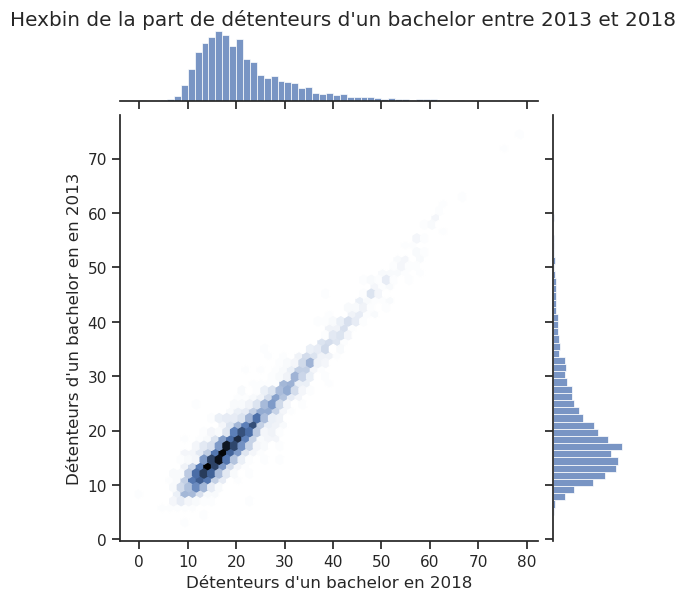

In [202]:
sns.set_theme(style="ticks")
x = total_db_geo["bachelors_deg_year_2018"]
y = total_db_geo["bachelors_deg_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex")
joint_plot.set_axis_labels("Détenteurs d'un bachelor en 2018", "Détenteurs d'un bachelor en en 2013")
joint_plot.fig.suptitle("Hexbin de la part de détenteurs d'un bachelor entre 2013 et 2018", y =1)

Encore une fois, les données suggèrent qu'utiliser une année ou l'autre n'aura pas d'influence sur les résultats de l'analyse du fait de la similarité des années.

### Bénéficaires du programme SNAP

In [203]:
print("Encore une fois, les données suggèrent qu'utiliser une année ou l'autre n'aura pas d'influence sur les résultats de l'analyse du fait de la similarité des années.")
print("Bénéficaires du programme SNAP")

Encore une fois, les données suggèrent qu'utiliser une année ou l'autre n'aura pas d'influence sur les résultats de l'analyse du fait de la similarité des années.
Bénéficaires du programme SNAP


In [204]:
total_db_geo["snap_share_year_2013"] = total_db_geo["snap_beneficiaries_year_2013"] / total_db_geo["resident_pop_year_2013"] / 1000
total_db_geo["snap_share_year_2014"] = total_db_geo["snap_beneficiaries_year_2014"] / total_db_geo["resident_pop_year_2014"] / 1000
total_db_geo["snap_share_year_2015"] = total_db_geo["snap_beneficiaries_year_2015"] / total_db_geo["resident_pop_year_2015"] / 1000
total_db_geo["snap_share_year_2016"] = total_db_geo["snap_beneficiaries_year_2016"] / total_db_geo["resident_pop_year_2016"] / 1000
total_db_geo["snap_share_year_2017"] = total_db_geo["snap_beneficiaries_year_2017"] / total_db_geo["resident_pop_year_2017"] / 1000
total_db_geo["snap_share_year_2018"] = total_db_geo["snap_beneficiaries_year_2018"] / total_db_geo["resident_pop_year_2018"] / 1000


In [205]:
matrix = total_db_geo[["snap_share_year_2013", "snap_share_year_2014", "snap_share_year_2015", 
"snap_share_year_2016", "snap_share_year_2017", "snap_share_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des parts de bénéficiaires du SNAP", labels = {"color" : "Corrélation"})
fig.show()

Text(0.5, 1, 'Hexbin de la part bénéficaires du SNAP entre 2013 et 2018')

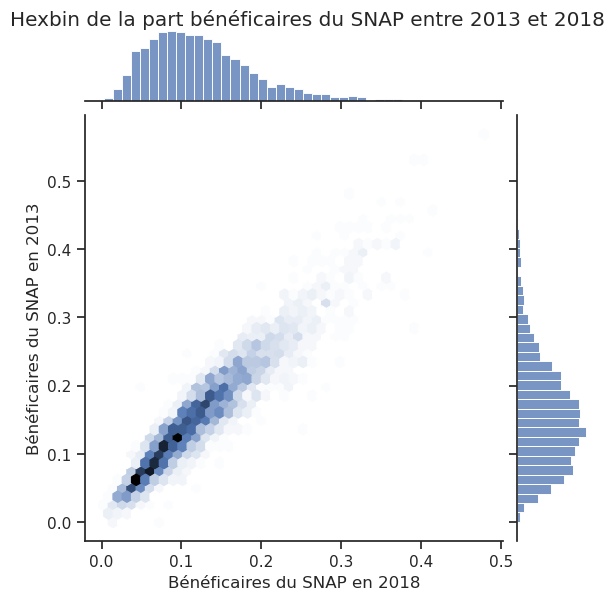

In [206]:
sns.set_theme(style="ticks")
x = total_db_geo["snap_share_year_2018"]
y = total_db_geo["snap_share_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex")
joint_plot.set_axis_labels("Bénéficaires du SNAP en 2018", "Bénéficaires du SNAP en 2013")
joint_plot.fig.suptitle("Hexbin de la part bénéficaires du SNAP entre 2013 et 2018", y =1)

Même si la diagonale est plus étalée en haut à droite (donc quand les valeurs sont relativement importantes), rien ne semble indiquer qu'il y a des différences significatives dans la structure des données entre ces deux années.

## Corrélation entre les variables

Nous allons arbitrairement prendre les variables de 2013. Nous avons vu précédemment que cela n'allait pas changer beaucoup les résultats des analyses.

In [207]:
print("Même si la diagonale est plus étalée en haut à droite (donc quand les valeurs sont relativement importantes), rien ne semble indiquer qu'il y a des différences significatives dans la structure des données entre ces deux années.")
print("Corrélation entre les variables")
print("Nous allons arbitrairement prendre les variables de 2013. Nous avons vu précédemment que cela n'allait pas changer beaucoup les résultats des analyses.")

Même si la diagonale est plus étalée en haut à droite (donc quand les valeurs sont relativement importantes), rien ne semble indiquer qu'il y a des différences significatives dans la structure des données entre ces deux années.
Corrélation entre les variables
Nous allons arbitrairement prendre les variables de 2013. Nous avons vu précédemment que cela n'allait pas changer beaucoup les résultats des analyses.


In [208]:
matrix = total_db_geo[["unemp_rate_year_2013", "snap_share_year_2013", "bachelors_deg_year_2013", "med_h_income_year_2013", "per_dem", "score_legis"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation de 2013", labels = {"color" : "Corrélation"})
fig.show()

Les corrélations sont logiques et relativement aisées à expliquer, sauf pour le score legislatif. Le taux de chômage est postiviment corrélé aux bénéficiaires de l'aide alimentaire (suggère des comtés paupérisés), négativement à la part de détenteurs d'un bachelor (les plus éduqués sont a priori moins au chômage que les autres), négativement au revenu médian (plus il y a de chômage, plus ce revenu est abs a priori), et positivement au vote démocrate (plus diffile à bien expliquer).

Globalement, les variables "positives" comme le revenu médian et la part de diplômés sont positivement corrélées entre elles et négativement corrélées avec les variables "négatives" comme la part de bénéficiaires de l'aide alimentaire et le taux de chômage. Le vote démocrate a la même corrélation avec toutes les variables (0.2), sauf pour la part de détenteurs d'un bachelor, qui est plus forte (0.4) : cela s'explique bien car les plus éduqués votent plus démocrates que les autres.

La corrélation la plus forte du score législatif (hormis avec lui-même) est avec le revenu médian et avec le vote démocrate. Peut-être que certains états pauvres votent démocrates et ont donc une législation plus forte sur les armes, mais il est difficile de tirer de réelles conclusions à partir de ces corrélations là.

# Liens de ces caractéristiques avec la violence par arme à feu

Maintenant que nous avons décrit plus en détail les comtés, nous allons esssayer de voir comment cela s'articule avec les données sur les violences par arme à feu. Commençons par la densité des incidents.

In [209]:
print("Les corrélations sont logiques et relativement aisées à expliquer, sauf pour le score legislatif. Le taux de chômage est postiviment corrélé aux bénéficiaires de l'aide alimentaire (suggère des comtés paupérisés), négativement à la part de détenteurs d'un bachelor (les plus éduqués sont a priori moins au chômage que les autres), négativement au revenu médian (plus il y a de chômage, plus ce revenu est abs a priori), et positivement au vote démocrate (plus diffile à bien expliquer).")
print("Globalement, les variables 'positives' comme le revenu médian et la part de diplômés sont positivement corrélées entre elles et négativement corrélées avec les variables 'négatives' comme la part de bénéficiaires de l'aide alimentaire et le taux de chômage. Le vote démocrate a la même corrélation avec toutes les variables (0.2), sauf pour la part de détenteurs d'un bachelor, qui est plus forte (0.4) : cela s'explique bien car les plus éduqués votent plus démocrates que les autres.")
print("La corrélation la plus forte du score législatif (hormis avec lui-même) est avec le revenu médian et avec le vote démocrate. Peut-être que certains états pauvres votent démocrates et ont donc une législation plus forte sur les armes, mais il est difficile de tirer de réelles conclusions à partir de ces corrélations là.")
print("Liens de ces caractéristiques avec la violence par arme à feu")
print("Maintenant que nous avons décrit plus en détail les comtés, nous allons esssayer de voir comment cela s'articule avec les données sur les violences par arme à feu. Commençons par la densité des incidents.")

Les corrélations sont logiques et relativement aisées à expliquer, sauf pour le score legislatif. Le taux de chômage est postiviment corrélé aux bénéficiaires de l'aide alimentaire (suggère des comtés paupérisés), négativement à la part de détenteurs d'un bachelor (les plus éduqués sont a priori moins au chômage que les autres), négativement au revenu médian (plus il y a de chômage, plus ce revenu est abs a priori), et positivement au vote démocrate (plus diffile à bien expliquer).
Globalement, les variables 'positives' comme le revenu médian et la part de diplômés sont positivement corrélées entre elles et négativement corrélées avec les variables 'négatives' comme la part de bénéficiaires de l'aide alimentaire et le taux de chômage. Le vote démocrate a la même corrélation avec toutes les variables (0.2), sauf pour la part de détenteurs d'un bachelor, qui est plus forte (0.4) : cela s'explique bien car les plus éduqués votent plus démocrates que les autres.
La corrélation la plus fort

In [210]:
#count of incidents for each county
incident_count_by_county = merge_geo.groupby('id_county')['incident_id'].count().reset_index() 

#new dataframe with the count
incident_pop_geo=pd.merge(incident_count_by_county,merge_geo, on='id_county', how='right')
incident_pop_geo.rename(columns={'incident_id_x':'incident_count_by_county'}, inplace=True)

#calcul de la densité
agg_incident_county = incident_pop_geo.groupby('id_county').agg({'incident_count_by_county': 'first', 'resident_pop_year_2016': 'first'}).reset_index()
agg_incident_county['incident_density'] = agg_incident_county['incident_count_by_county'] / agg_incident_county['resident_pop_year_2016'] / 1000


# Create a GeoDataFrame with the incident density
incident_density_geo = total_db_geo.merge(agg_incident_county, on='id_county', how='left')
incident_density_geo["incident_density"] = incident_density_geo["incident_density"] * 1000

# ajouter la valeur à 0 à ceux qui n'apparaissaient pas dans la base de gun violences
incident_density_geo["incident_density"] = incident_density_geo["incident_density"].fillna(0)
incident_density_geo["incident_count_by_county"] = incident_density_geo["incident_count_by_county"].fillna(0)

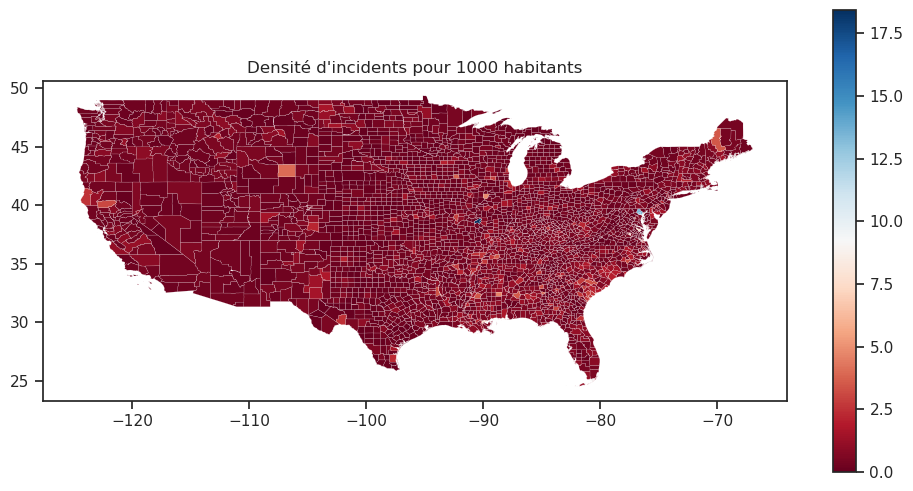

In [211]:
incident_density_geo.plot(aspect = 1, figsize = (12,6), legend = True, linewidth = 0.1, cmap = "RdBu", 
column = "incident_density")

plt.title("Densité d'incidents pour 1000 habitants")
plt.show()

Encore une fois, la carte est difficile à lire. Nous allons donc utiliser la même méthode que précédemment et regrouper les comtés dans 4 quantiles.

In [212]:
print("Encore une fois, la carte est difficile à lire. Nous allons donc utiliser la même méthode que précédemment et regrouper les comtés dans 4 quantiles.")

Encore une fois, la carte est difficile à lire. Nous allons donc utiliser la même méthode que précédemment et regrouper les comtés dans 4 quantiles.


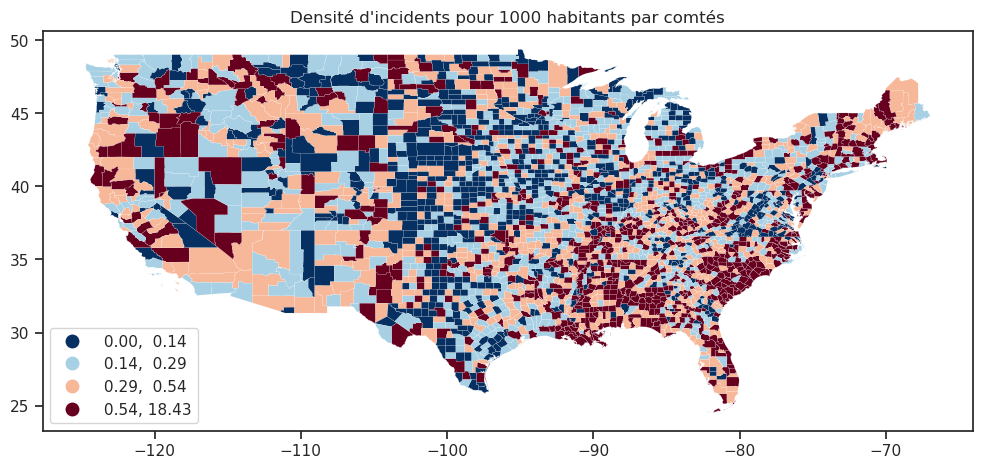

In [213]:
incident_density_geo.plot(aspect = 1, figsize = (12,6), legend = True, linewidth = 0.1, cmap = "RdBu_r", 
column = "incident_density", scheme = "QUANTILES", k=4, legend_kwds={'loc': 'lower left'})

plt.title("Densité d'incidents pour 1000 habitants par comtés")
plt.show()

Le centre du pays semble avoir une assez faible densité d'incidents, contrairements à la côte Est. La côte Ouest est quant à elle plus contrastée.

In [214]:
print("Le centre du pays semble avoir une assez faible densité d'incidents, contrairements à la côte Est. La côte Ouest est quant à elle plus contrastée.")

Le centre du pays semble avoir une assez faible densité d'incidents, contrairements à la côte Est. La côte Ouest est quant à elle plus contrastée.


In [215]:
incident_density_geo["state_resident_pop_year_2016"] = incident_density_geo.groupby("Etat")["resident_pop_year_2016_x"].transform("sum")
incident_density_geo["incident_count_by_state"] = incident_density_geo.groupby("Etat")["incident_count_by_county"].transform("sum")
incident_density_geo["incident_density_state"] = incident_density_geo["incident_count_by_state"] / incident_density_geo["state_resident_pop_year_2016"]

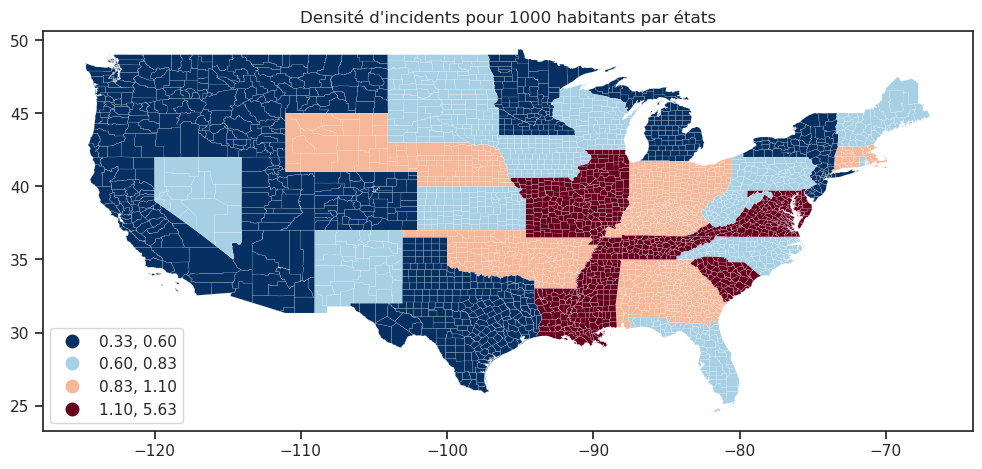

In [216]:
incident_density_geo.plot(aspect = 1, figsize = (12,6), legend = True, linewidth = 0.1, cmap = "RdBu_r", 
column = "incident_density_state", scheme = "QUANTILES", k=4, legend_kwds={'loc': 'lower left'})

plt.title("Densité d'incidents pour 1000 habitants par états")
plt.show()

Cette carte, quoique moins précise, est plus lisible que la précédente. On y voit que l'Ouest est globalement moins touché par les incidents à arme à fau que l'Est, qui concentre les états avec la plus grande densité.

In [217]:
print("Cette carte, quoique moins précise, est plus lisible que la précédente. On y voit que l'Ouest est globalement moins touché par les incidents à arme à fau que l'Est, qui concentre les états avec la plus grande densité.")

Cette carte, quoique moins précise, est plus lisible que la précédente. On y voit que l'Ouest est globalement moins touché par les incidents à arme à fau que l'Est, qui concentre les états avec la plus grande densité.


Text(0.5, 0, "Nombre d'incidents")

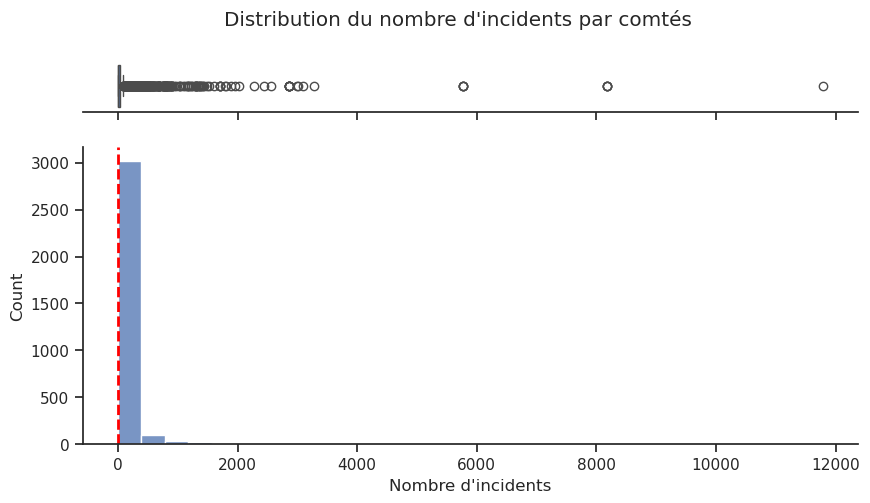

In [218]:
sns.set(style="ticks")
x = incident_density_geo["incident_count_by_county"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,5))

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution du nombre d'incidents par comtés")
ax_hist.set_xlabel("Nombre d'incidents")

On voit que la majorité des comtés ont moins de 500 incidents. Le graphique est cependant peu lisible à cause des importants outliers qui l'étirent. Après vérification manuelle, le comté avec le plus d'incident est le comté de Cook, dans l'Illinois. Cela se comprend assez bien car la ville de Chicago, réputée pour sa criminalité élevée, en est le chef-lieu.

In [219]:
print("On voit que la majorité des comtés ont moins de 500 incidents. Le graphique est cependant peu lisible à cause des importants outliers qui l'étirent. Après vérification manuelle, le comté avec le plus d'incident est le comté de Cook, dans l'Illinois. Cela se comprend assez bien car la ville de Chicago, réputée pour sa criminalité élevée, en est le chef-lieu.")

On voit que la majorité des comtés ont moins de 500 incidents. Le graphique est cependant peu lisible à cause des importants outliers qui l'étirent. Après vérification manuelle, le comté avec le plus d'incident est le comté de Cook, dans l'Illinois. Cela se comprend assez bien car la ville de Chicago, réputée pour sa criminalité élevée, en est le chef-lieu.


Text(0.5, 0, "Nombre d'incidents")

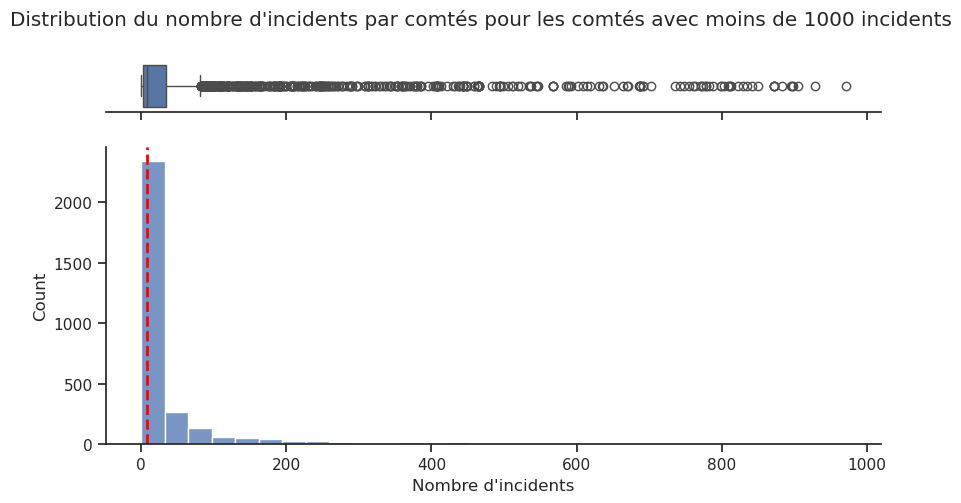

In [220]:
sns.set(style="ticks")
x = incident_density_geo[incident_density_geo["incident_count_by_county"] < 1000]["incident_count_by_county"]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,5))

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution du nombre d'incidents par comtés pour les comtés avec moins de 1000 incidents")
ax_hist.set_xlabel("Nombre d'incidents")

Même en ne prenant que les comtés avec moins de 1000 incidents la distribution garde la même forme : la majorité des comtés sont tout à gauche de la distribution (donc avec peu d'incidents) et de nombreux outliers atteignent des valeurs très importantes. Ils se voient sur le box plot mais pas sur l'histogramme.

In [221]:
print("Même en ne prenant que les comtés avec moins de 1000 incidents la distribution garde la même forme : la majorité des comtés sont tout à gauche de la distribution (donc avec peu d'incidents) et de nombreux outliers atteignent des valeurs très importantes. Ils se voient sur le box plot mais pas sur l'histogramme.")

Même en ne prenant que les comtés avec moins de 1000 incidents la distribution garde la même forme : la majorité des comtés sont tout à gauche de la distribution (donc avec peu d'incidents) et de nombreux outliers atteignent des valeurs très importantes. Ils se voient sur le box plot mais pas sur l'histogramme.


In [222]:
# comptage du nombre de suicides par comtés
# on fait la somme des indicatrices suicides après avoir groupé par comtés
incident_density_geo = incident_density_geo.merge(merge_geo.groupby('id_county')["indic_suicide"].sum(), on = "id_county", how = "left")
incident_density_geo = incident_density_geo.rename(columns = {"indic_suicide" : "suicide_by_county"})
incident_density_geo["suicide_by_county"] = incident_density_geo["suicide_by_county"].fillna(0)
incident_density_geo["suicide_density"] = incident_density_geo["suicide_by_county"] / incident_density_geo["resident_pop_year_2016_x"]

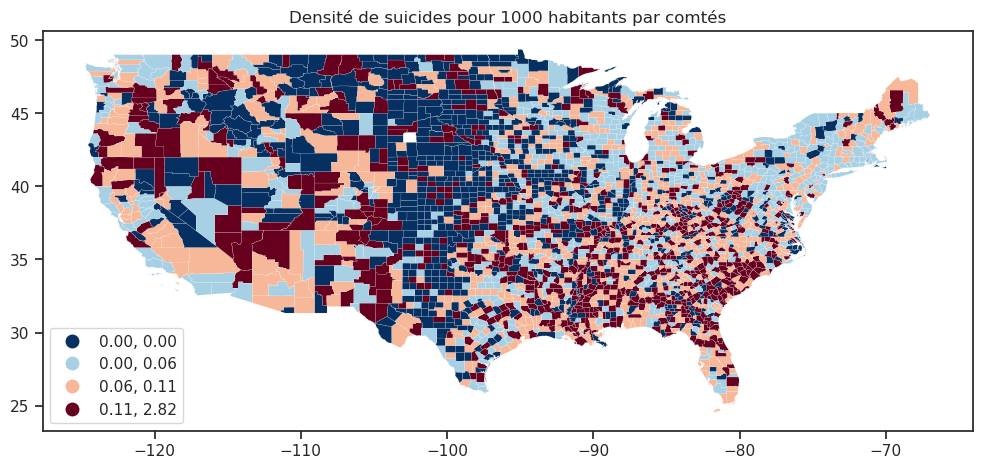

In [223]:
incident_density_geo.plot(aspect = 1, figsize = (12,6), legend = True, linewidth = 0.1, cmap = "RdBu_r", 
column = "suicide_density", scheme = "QUANTILES", k=4, legend_kwds={'loc': 'lower left'})

plt.title("Densité de suicides pour 1000 habitants par comtés")
plt.show()

A l'Ouest, les grands comtés (donc les plus ruraux) semblent être les plus touchés. Le centre du pays semble relativement moins touché. A l'Est, il est difficile de décrire quelque chose de précis, si ce n'est que la Géorgie et les deux Caroline paraissent être plus touchées que la moyenne.

In [224]:
print("A l'Ouest, les grands comtés (donc les plus ruraux) semblent être les plus touchés. Le centre du pays semble relativement moins touché. A l'Est, il est difficile de décrire quelque chose de précis, si ce n'est que la Géorgie et les deux Caroline paraissent être plus touchées que la moyenne.")

A l'Ouest, les grands comtés (donc les plus ruraux) semblent être les plus touchés. Le centre du pays semble relativement moins touché. A l'Est, il est difficile de décrire quelque chose de précis, si ce n'est que la Géorgie et les deux Caroline paraissent être plus touchées que la moyenne.


Text(0.5, 0, "Nombre d'incidents")

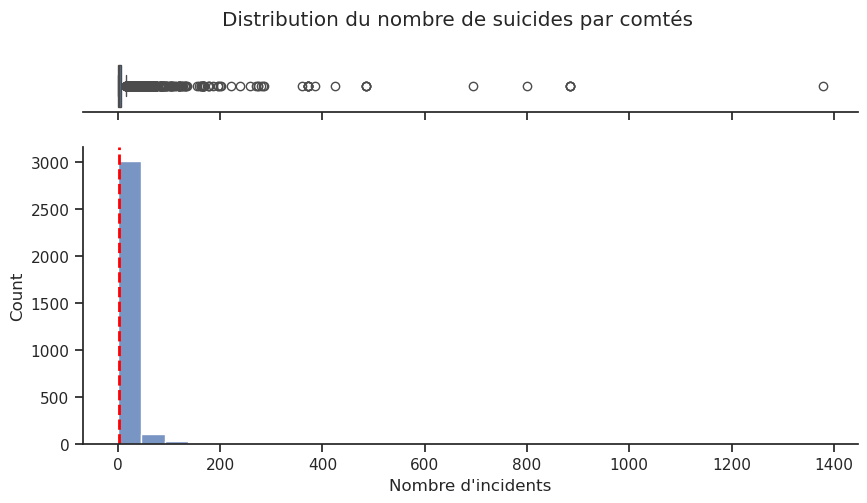

In [225]:
sns.set(style="ticks")
x = incident_density_geo["suicide_by_county"]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,5))

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution du nombre de suicides par comtés")
ax_hist.set_xlabel("Nombre d'incidents")

On observe la même forme de distribution que pour les incidents. La seule différence est que tout semble diviser par 10, ce qui est logique puisque les suicides représentent environ 13% des incidents.

Intéressons nous désormais au nombre de tués et de blessés.

In [226]:
print("On observe la même forme de distribution que pour les incidents. La seule différence est que tout semble diviser par 10, ce qui est logique puisque les suicides représentent environ 13% des incidents.")
print("Intéressons nous désormais au nombre de tués et de blessés.")

On observe la même forme de distribution que pour les incidents. La seule différence est que tout semble diviser par 10, ce qui est logique puisque les suicides représentent environ 13% des incidents.
Intéressons nous désormais au nombre de tués et de blessés.


In [227]:
# calcul du nombre de tués par county
incident_density_geo = incident_density_geo.merge(merge_geo.groupby('id_county')["n_killed"].sum(), on = "id_county", how = "left")
incident_density_geo = incident_density_geo.rename(columns = {"n_killed" : "n_killed_by_county"})
incident_density_geo["n_killed_by_county"] = incident_density_geo["n_killed_by_county"].fillna(0)
incident_density_geo["n_killed_density"] = incident_density_geo["n_killed_by_county"] / incident_density_geo["resident_pop_year_2016_x"]

# calcul du nombre de blessés par county
incident_density_geo = incident_density_geo.merge(merge_geo.groupby('id_county')["n_injured"].sum(), on = "id_county", how = "left")
incident_density_geo = incident_density_geo.rename(columns = {"n_injured" : "n_injured_by_county"})
incident_density_geo["n_injured_by_county"] = incident_density_geo["n_injured_by_county"].fillna(0)
incident_density_geo["n_injured_density"] = incident_density_geo["n_injured_by_county"] / incident_density_geo["resident_pop_year_2016_x"]


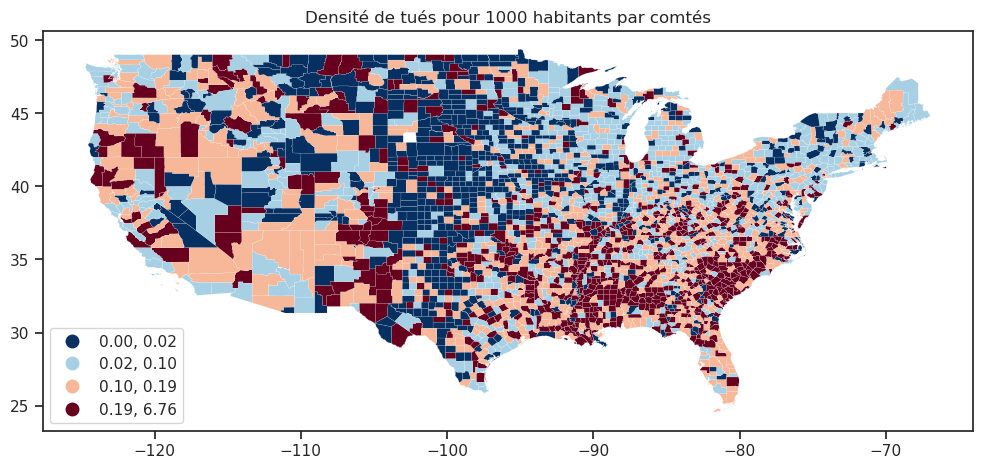

In [228]:
incident_density_geo.plot(aspect = 1, figsize = (12,6), legend = True, linewidth = 0.1, cmap = "RdBu_r", 
column = "n_killed_density", scheme = "QUANTILES", k=4, legend_kwds={'loc': 'lower left'})

plt.title("Densité de tués pour 1000 habitants par comtés")
plt.show()

La distribution reste relativement proche de celles des incidents. Le centre paraît moins touchés par les victimes que les incidents, mais c'est la seule différence vraiment visible.

In [229]:
print("La distribution reste relativement proche de celles des incidents. Le centre paraît moins touchés par les victimes que les incidents, mais c'est la seule différence vraiment visible.")

La distribution reste relativement proche de celles des incidents. Le centre paraît moins touchés par les victimes que les incidents, mais c'est la seule différence vraiment visible.


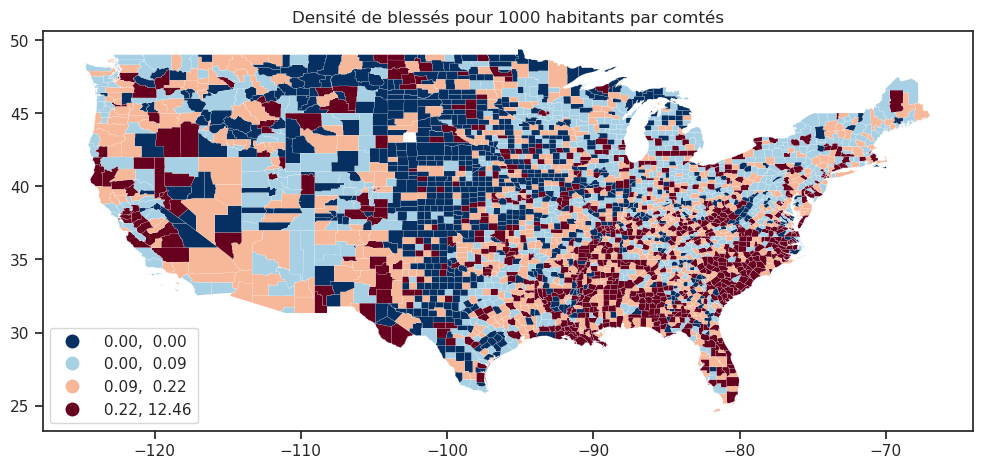

In [230]:
incident_density_geo.plot(aspect = 1, figsize = (12,6), legend = True, linewidth = 0.1, cmap = "RdBu_r", 
column = "n_injured_density", scheme = "QUANTILES", k=4, legend_kwds={'loc': 'lower left'})

plt.title("Densité de blessés pour 1000 habitants par comtés")
plt.show()

La distribution est très similaire à celles des tués.

Corrélation avec les variables sociaux démographiques.

In [231]:
print("La distribution est très similaire à celles des tués.")
print("Corrélation avec les variables sociaux démographiques")

La distribution est très similaire à celles des tués.
Corrélation avec les variables sociaux démographiques


In [232]:
matrix = incident_density_geo[["unemp_rate_year_2013", "snap_share_year_2013", "bachelors_deg_year_2013", 
"med_h_income_year_2013", "per_dem", "score_legis", "incident_density", "suicide_density", "n_killed_density", "n_injured_density"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation de 2013", labels = {"color" : "Corrélation"})
fig.show()

La densité d'incidents ne semble être corrélées de façon significative qu'avec les autres variables dépendants des incidents. On peut cependant remarquer la corrélation positive avec le vote démocrate et avec la part de bénéficaires de l'aide alimentaire.

On observe le même phénomène pour les trois autres variables des incidents (densité de suicide, de morts et de blessés). Cela semble donc indiquer que les variables sociaux démographiques étudiées précédemment ne permettent pas vraiment d'expliquer l'apparition des incidents et de leurs victimes.

In [233]:
print("La densité d'incidents ne semble être corrélées de façon significative qu'avec les autres variables dépendants des incidents. On peut cependant remarquer la corrélation positive avec le vote démocrate et avec la part de bénéficaires de l'aide alimentaire.")
print("On observe le même phénomène pour les trois autres variables des incidents (densité de suicide, de morts et de blessés). Cela semble donc indiquer que les variables sociaux démographiques étudiées précédemment ne permettent pas vraiment d'expliquer l'apparition des incidents et de leurs victimes.")

La densité d'incidents ne semble être corrélées de façon significative qu'avec les autres variables dépendants des incidents. On peut cependant remarquer la corrélation positive avec le vote démocrate et avec la part de bénéficaires de l'aide alimentaire.
On observe le même phénomène pour les trois autres variables des incidents (densité de suicide, de morts et de blessés). Cela semble donc indiquer que les variables sociaux démographiques étudiées précédemment ne permettent pas vraiment d'expliquer l'apparition des incidents et de leurs victimes.


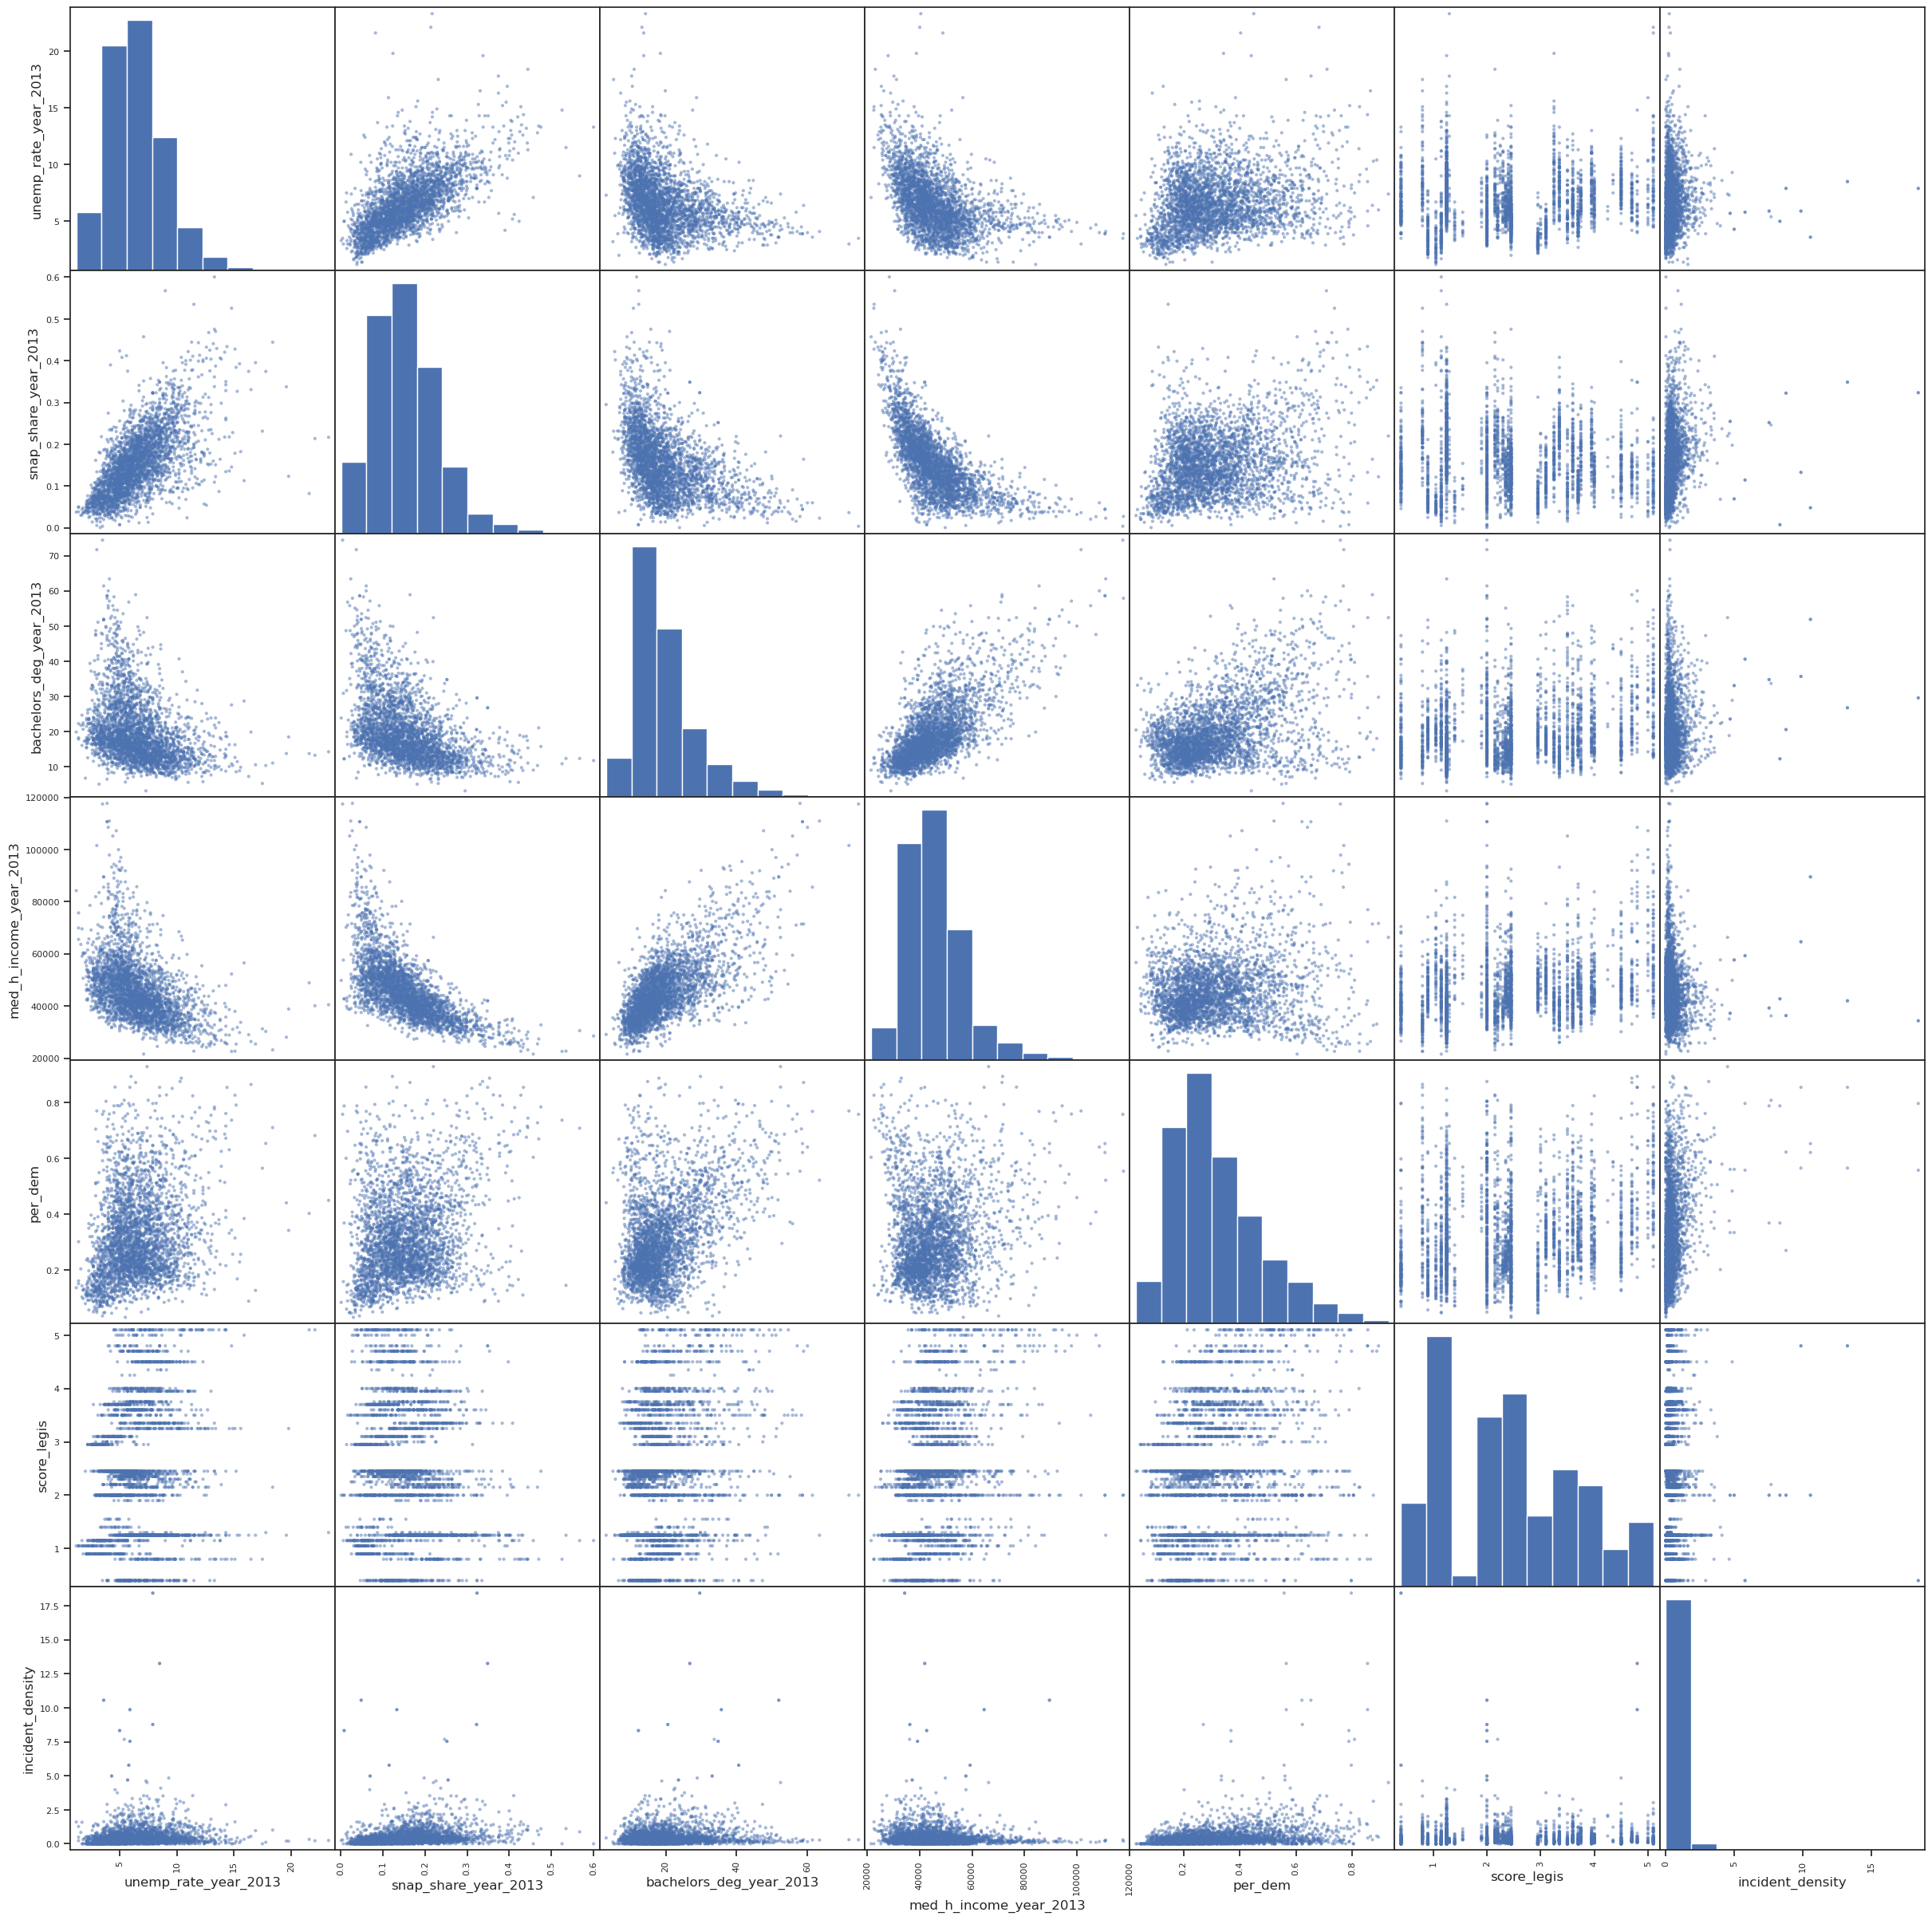

In [234]:
matrix = incident_density_geo[["unemp_rate_year_2013", "snap_share_year_2013", "bachelors_deg_year_2013", 
"med_h_income_year_2013", "per_dem", "score_legis", "incident_density"]]
scatter = pd.plotting.scatter_matrix(matrix, figsize = (30,30))

On voit sur la dernière ligne que la densité des incidents semblent pouvoir n'être simplement prédite à partir d'aucune des variables sélectionnées précédemment.

On observe la même chose pour la densité de tués, blessés et suicides.

In [235]:
print("On voit sur la dernière ligne que la densité des incidents semblent pouvoir n'être prédite simplement à partir d'aucune des variables sélectionnées précédemment.")
print("On observe la même chose pour la densité de tués, blessés et suicides.")

On voit sur la dernière ligne que la densité des incidents semblent pouvoir n'être prédite simplement à partir d'aucune des variables sélectionnées précédemment.
On observe la même chose pour la densité de tués, blessés et suicides.
